# IMPORT DATASET AND LIBRARIES

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [90]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data/marketing_campaign_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [92]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [93]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i


- Dataset has 29 columns and 2240 rows of data
- There are 3 types of data types viz: int64, object, float64
- The 'Income' column has 2216 non-null values, and 24 null/missing values

## **Duplicated Rows**

In [94]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [95]:
df.duplicated().sum()

0

## **Missing Values**

In [96]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [97]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage Data Type
Income                              24       1.071     int64
ID                                   0           0     int64
Z_CostContact                        0           0     int64
Complain                             0           0    object
AcceptedCmp2                         0           0    object
AcceptedCmp1                         0           0   float64
AcceptedCmp5                         0           0     int64
AcceptedCmp4                         0           0     int64
AcceptedCmp3                         0           0    object
NumWebVisitsMonth                    0           0     int64
NumStorePurchases                    0           0     int64
NumCatalogPurchases                  0           0     int64
NumWebPurchases                      0           0     int64
NumDealsPurchases                    0           0     int64
Z_Revenue                            0           0     in

<Figure size 1000x600 with 0 Axes>

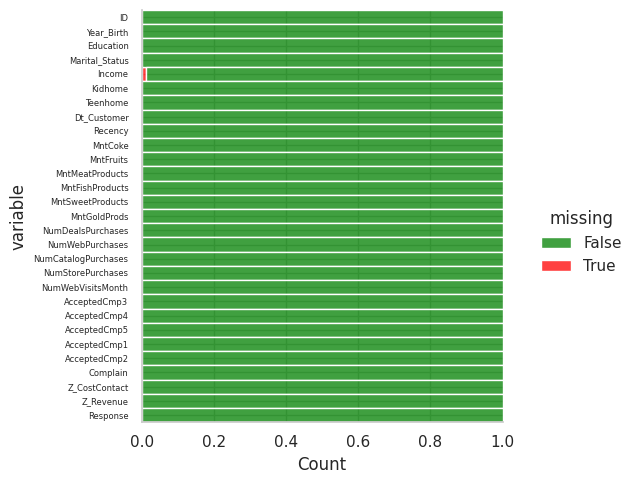

In [98]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["green","red"]
)

dms.set_yticklabels(size = 6)

## Data Types
**Change the Some column data type**

In [99]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1',
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain', 'Response']

num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
            'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

In [100]:
df[cat_cols] = df[cat_cols].astype("category")

In [101]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   category      
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntCoke              2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **Categorical Features**

In [103]:
print('The number of categorical features is {}'.format(len(cat_cols)))

The number of categorical features is 10


In [104]:
dfc = df.copy()
dfc["Year_Birth"] = dfc["Year_Birth"].astype("category")
cat = cat_cols.copy()
cat.insert(1, "Year_Birth")
dfc[cat].describe().transpose()

count unique      top  freq
ID              2240   2240        0     1
Year_Birth      2240     59     1976    89
Education       2240      5       S1  1127
Marital_Status  2240      6  Menikah   864
AcceptedCmp1    2240      2        0  2096
AcceptedCmp2    2240      2        0  2210
AcceptedCmp3    2240      2        0  2077
AcceptedCmp4    2240      2        0  2073
AcceptedCmp5    2240      2        0  2077
Complain        2240      2        0  2219
Response        2240      2        0  1906

In [105]:
#cek unique value
for x in df.columns :
    unq = list(df[x].unique())
    sorted(unq)

    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['S1', 'S3', 'S2', 'SMA', 'D3']

===== Marital_Status =====
['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda']

===== Income =====
[58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0, 62513000.0, 55635000.0, 33454000.0, 30351000.0, 5648000.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
[numpy.datetime64('2012-04-09T00:00:00.000000000'), numpy.datetime64('2014-08-03T00:00:00.000000000'), numpy.datetime64('2013-08-21T00:00:00.000000000'), numpy.datetime64('2014-10-02T00:00:00.000000000'), numpy.datetime64('2014-01-19T00:00:00.000000000'), numpy.datetime64('2013-09-09T00:00:00.000000000'), numpy.datetime64('2012-11-13T00:00:00.000000000'), numpy.datetime64('2013-08-05T00:00:00.000000000'), numpy.datetime64('2013-06-06T0

In [106]:
cat = cat_cols.copy()
cat.insert(1, "Year_Birth")
for i in cat:
    print(i)
    print(df[i].value_counts().iloc[:10])
    print()

ID
0       1
7375    1
7348    1
7349    1
7352    1
7366    1
7369    1
7373    1
7378    1
7327    1
Name: ID, dtype: int64

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
Name: Year_Birth, dtype: int64

Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

AcceptedCmp1
0    2096
1     144
Name: AcceptedCmp1, dtype: int64

AcceptedCmp2
0    2210
1      30
Name: AcceptedCmp2, dtype: int64

AcceptedCmp3
0    2077
1     163
Name: AcceptedCmp3, dtype: int64

AcceptedCmp4
0    2073
1     167
Name: AcceptedCmp4, dtype: int64

AcceptedCmp5
0    2077
1     163
Name: AcceptedCmp5, dtype: int64

Complain
0    2219
1      21
Name: Complain, dtype: int64

Response
0    1906
1     334
Name: Response, dtype: int64



# **EXPLORATORY DATA ANALYSIS (EDA)**

### **Uni-variate Analysis**

#### **Individual Boxplot and Violinplot**

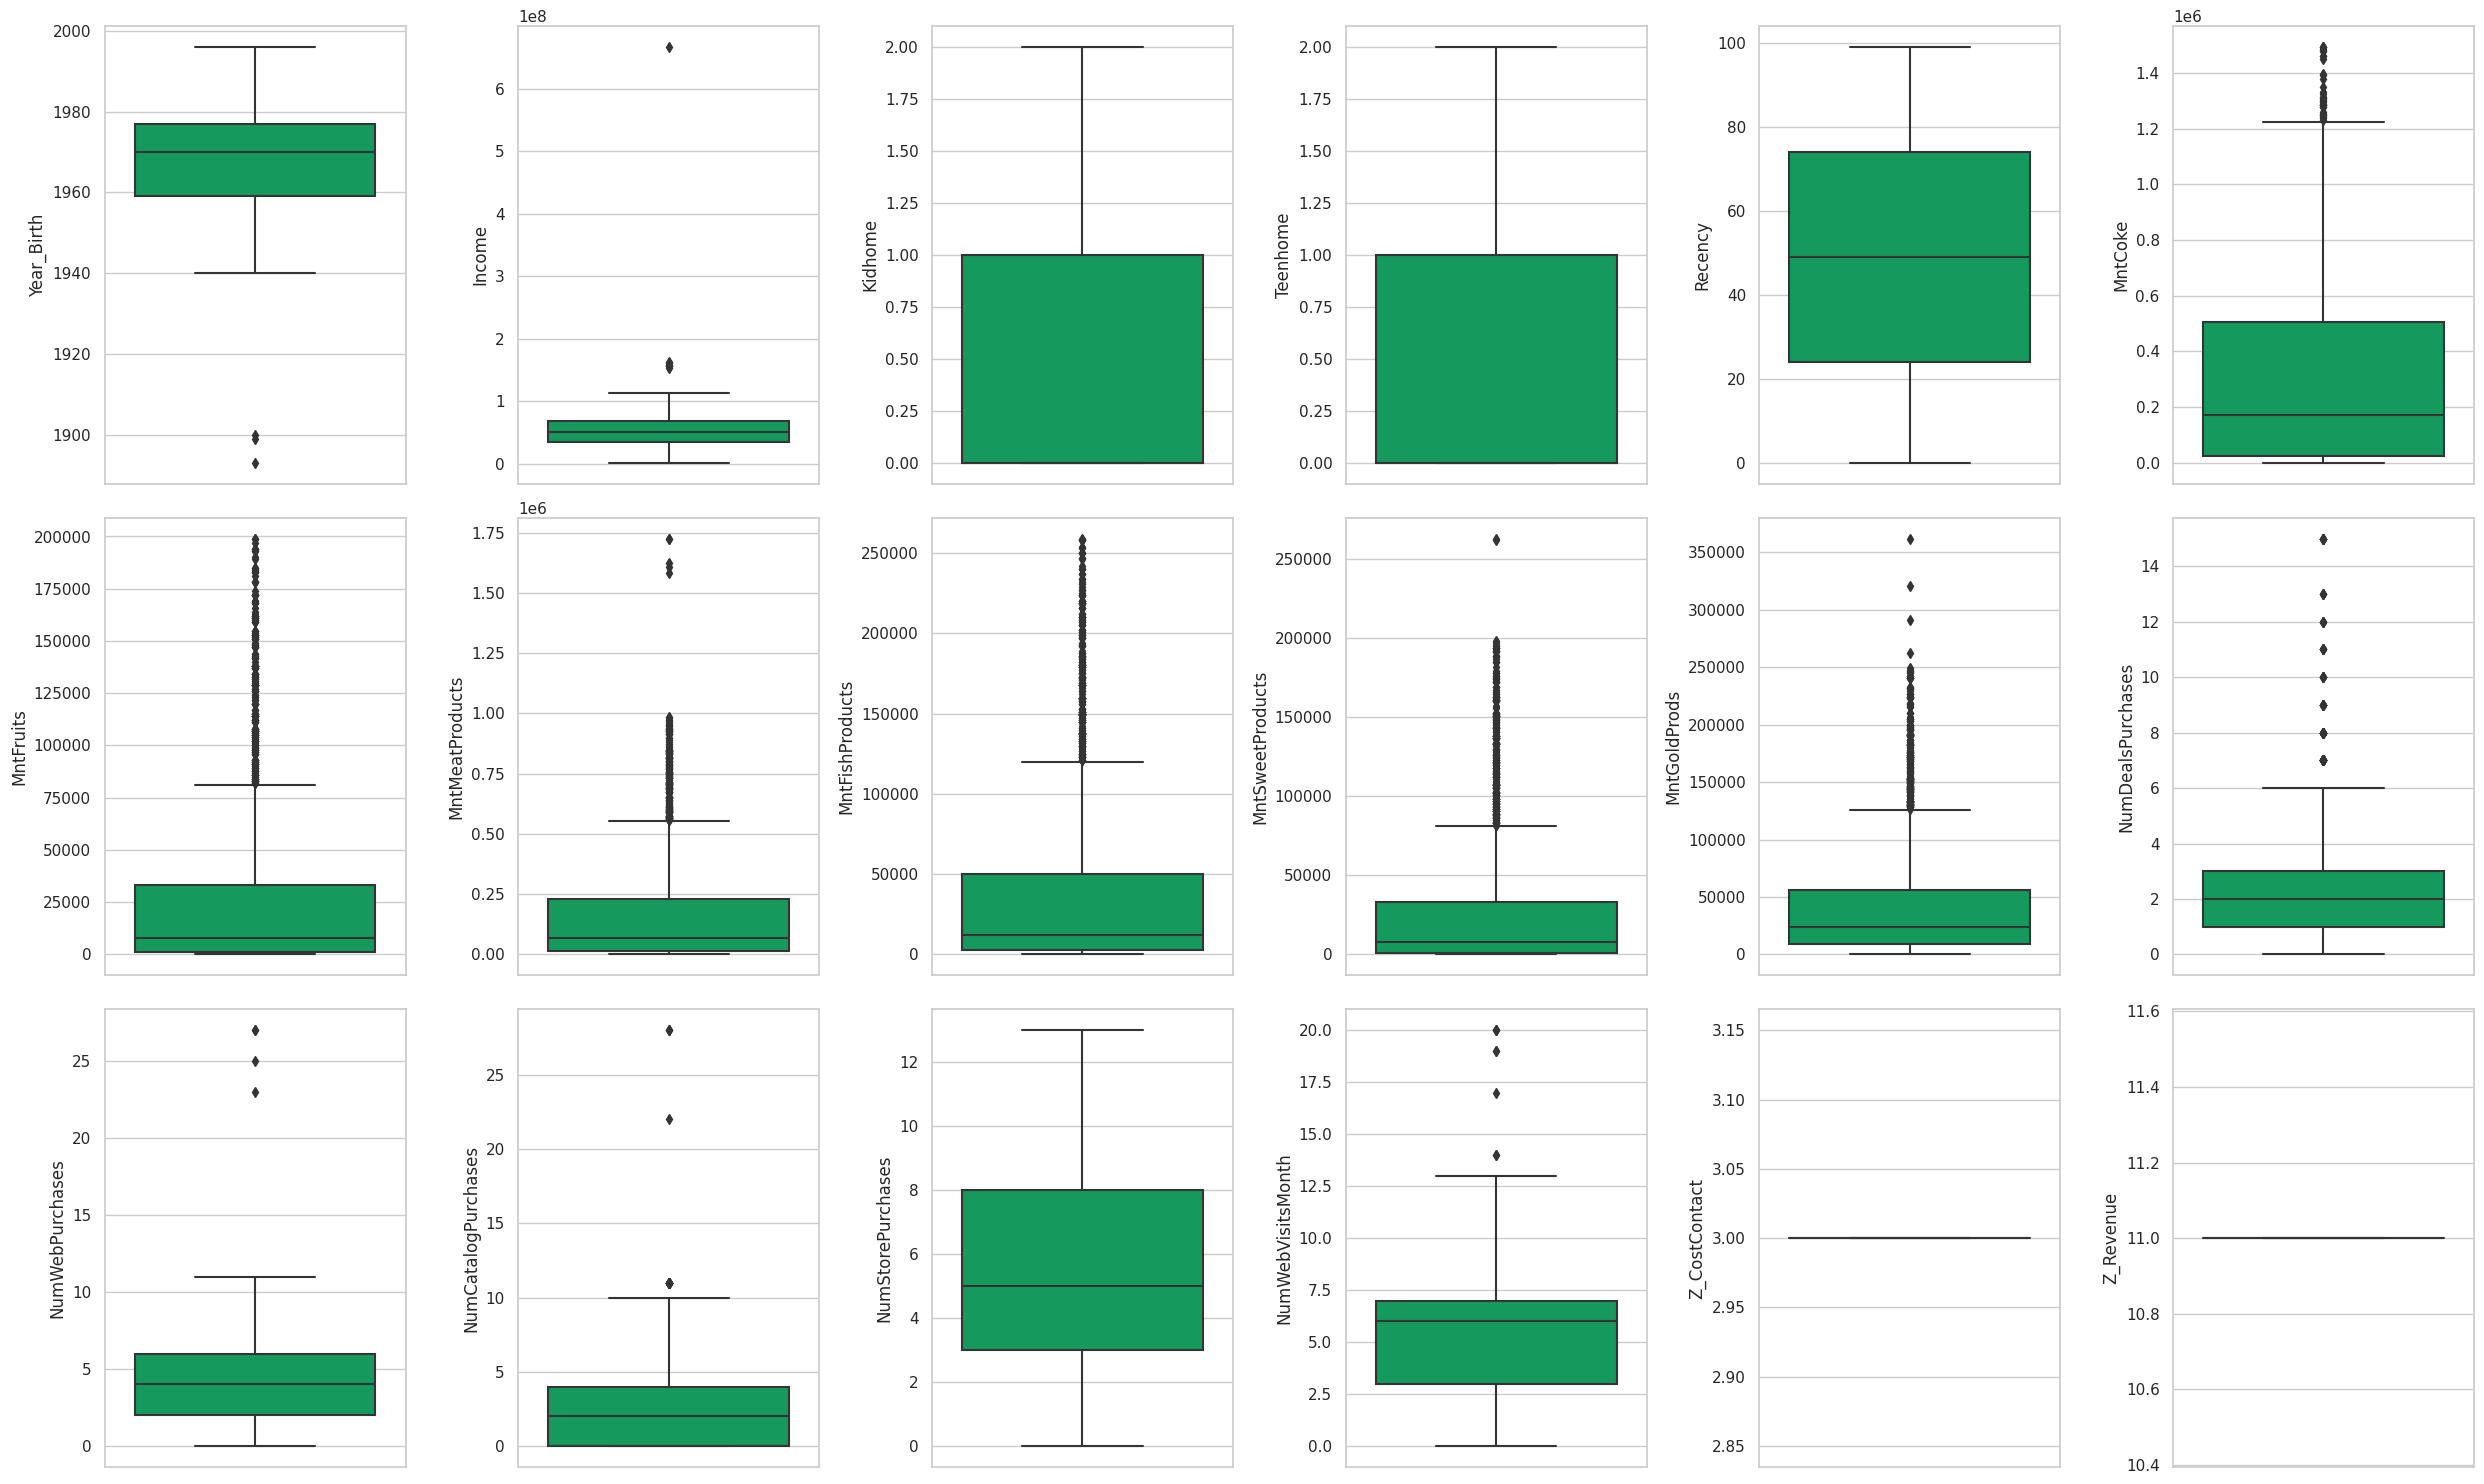

In [107]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(y=df[num_cols[i]], color='#00af5f', orient='v')
    plt.tight_layout()

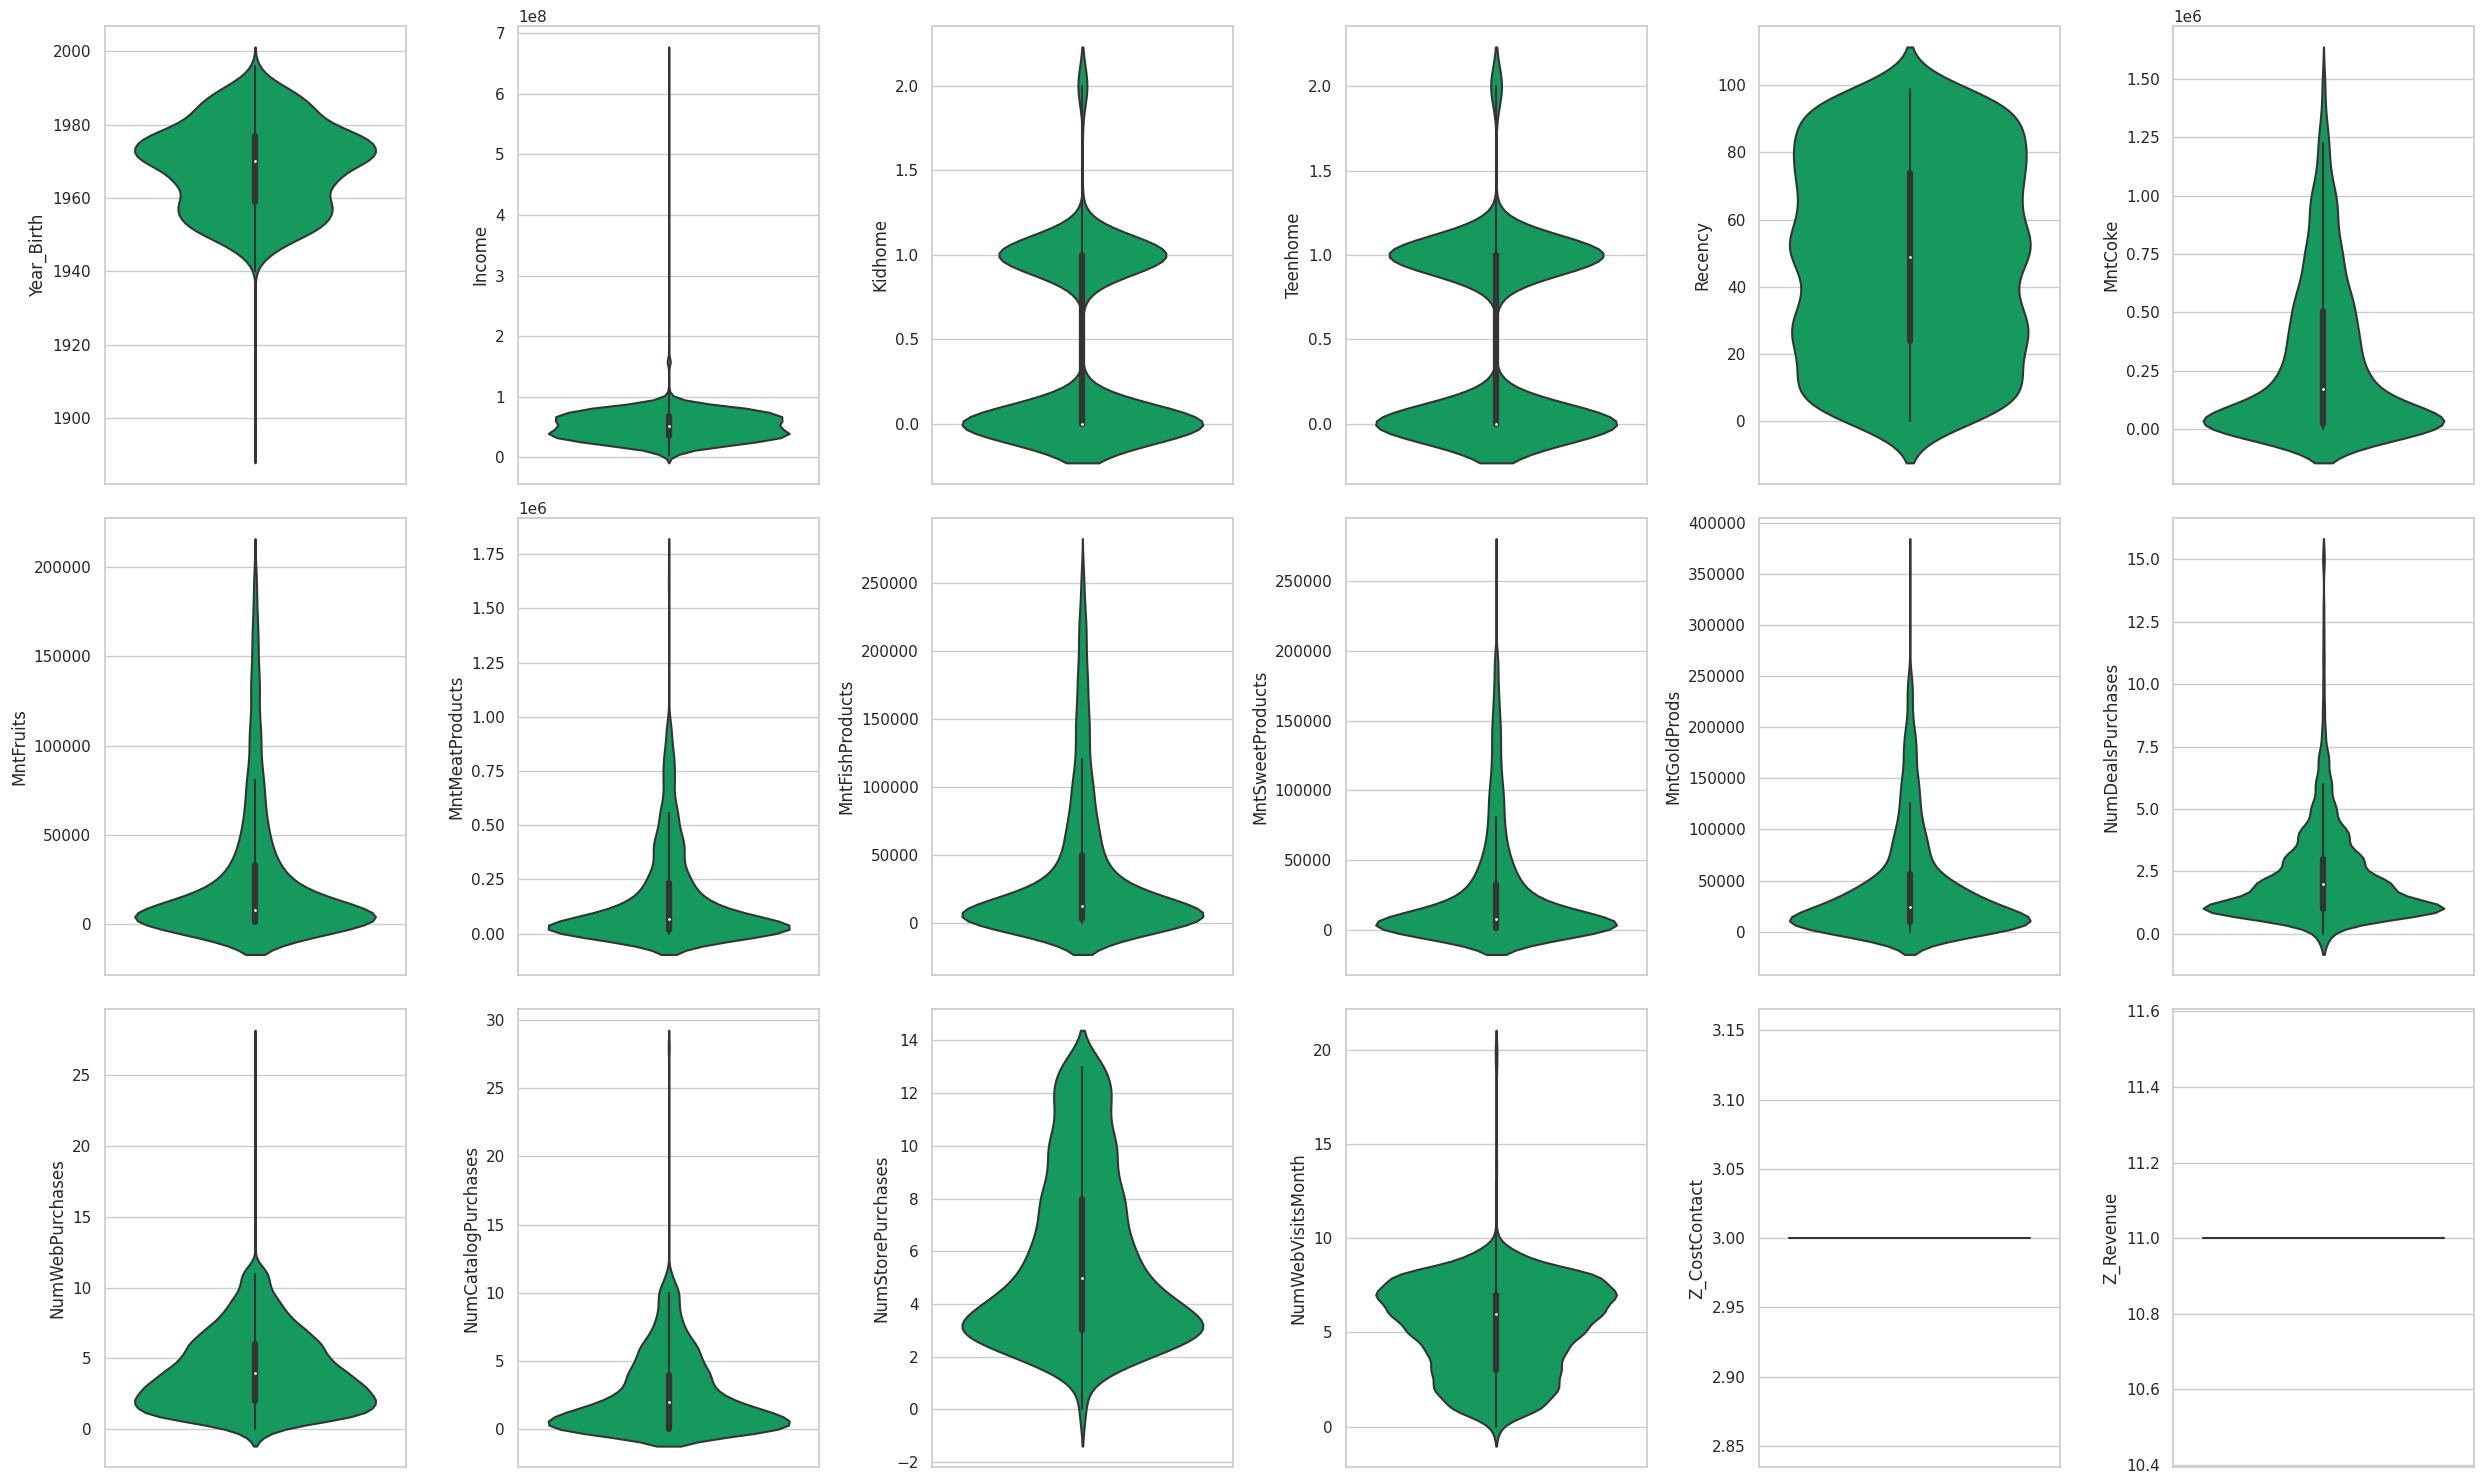

In [108]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.violinplot(y=df[num_cols[i]], color='#00af5f',orient='v')
    plt.tight_layout()

**Checking Outlier**

In [109]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 723
Not Outlier All Data : 1517



Column Name  is Outlier  Lower Limit  Upper Limit  Outlier  \
0            Year_Birth        True         1932         2004        3   
1                Income        True    -14525500    118350500       32   
2               Kidhome       False       -1.500        2.500        0   
3              Teenhome       False       -1.500        2.500        0   
4               Recency       False          -51          149        0   
5               MntCoke        True      -697000      1225000       35   
6             MntFruits        True       -47000        81000      227   
7       MntMeatProducts        True      -308000       556000      175   
8       MntFishProducts        True       -67500       120500      223   
9      MntSweetProducts        True       -47000        81000      248   
10         MntGoldProds        True       -61500       126500      207   
11    NumDealsPurchases        True           -2            6       86   
12      NumWebPurchases        True           -4           12        4   
13  NumCatalogPurchases        True           -6           10       23   
14    NumStorePurchases       False       -4.500       15.500        0   
15    NumWebVisitsMonth        True           -3           13        8   
16        Z_CostContact       False            3            3        0   
17            Z_Revenue       False           11           11        0   

    No Outlier  
0         2237  
1         2208  
2         2240  
3         2240  
4         2240  
5         2205  
6         2013  
7         2065  
8         2017  
9         1992  
10        2033  
11        2154  
12        2236  
13        2217  
14        2240  
15        2232  
16        2240  
17        2240

Observations:.

There are outliers in some columns

* In the Year_of_Birth column, the furthest outlier is below 1900.
* In the Income column, the furthest outlier is above 600,000,000.
* In the MntCoke column, the outliers are at 150,000,000 and above.
* In the MntFruits column the outliers are around 80,000 to 200,000.
* In the MntMeatProducts column, the furthest outliers are around 175,000.
* In the MntFishProducts column, the outliers are around 125,000 to over 250,000.
* In the MntSweetProducts column, the furthest outliers are around 250,000.
* In the MntGoldProds column, the furthest outliers are around 350,000.
* In the NumDealsPurchases column, the furthest outlier is 15.
* In the column NumWebPurchases the outlier is about 25.
* In the NumCataloguePurchases column, the furthest outlier is above 25.
* In the column NumWebVisitsMonth the furthest outlier is at 20.
* In the Age column, the furthest outlier is above 120.
* In the Dependents column, the furthest outlier is at 3.
* In the Spending column, the furthest outlier is above 2,500,000.
* In the column Conversion_rate_web the furthest outlier is above 40.
* In the column Total_Purchases the furthest outlier is above 40.




#### **Individual Histogram / Distplot**

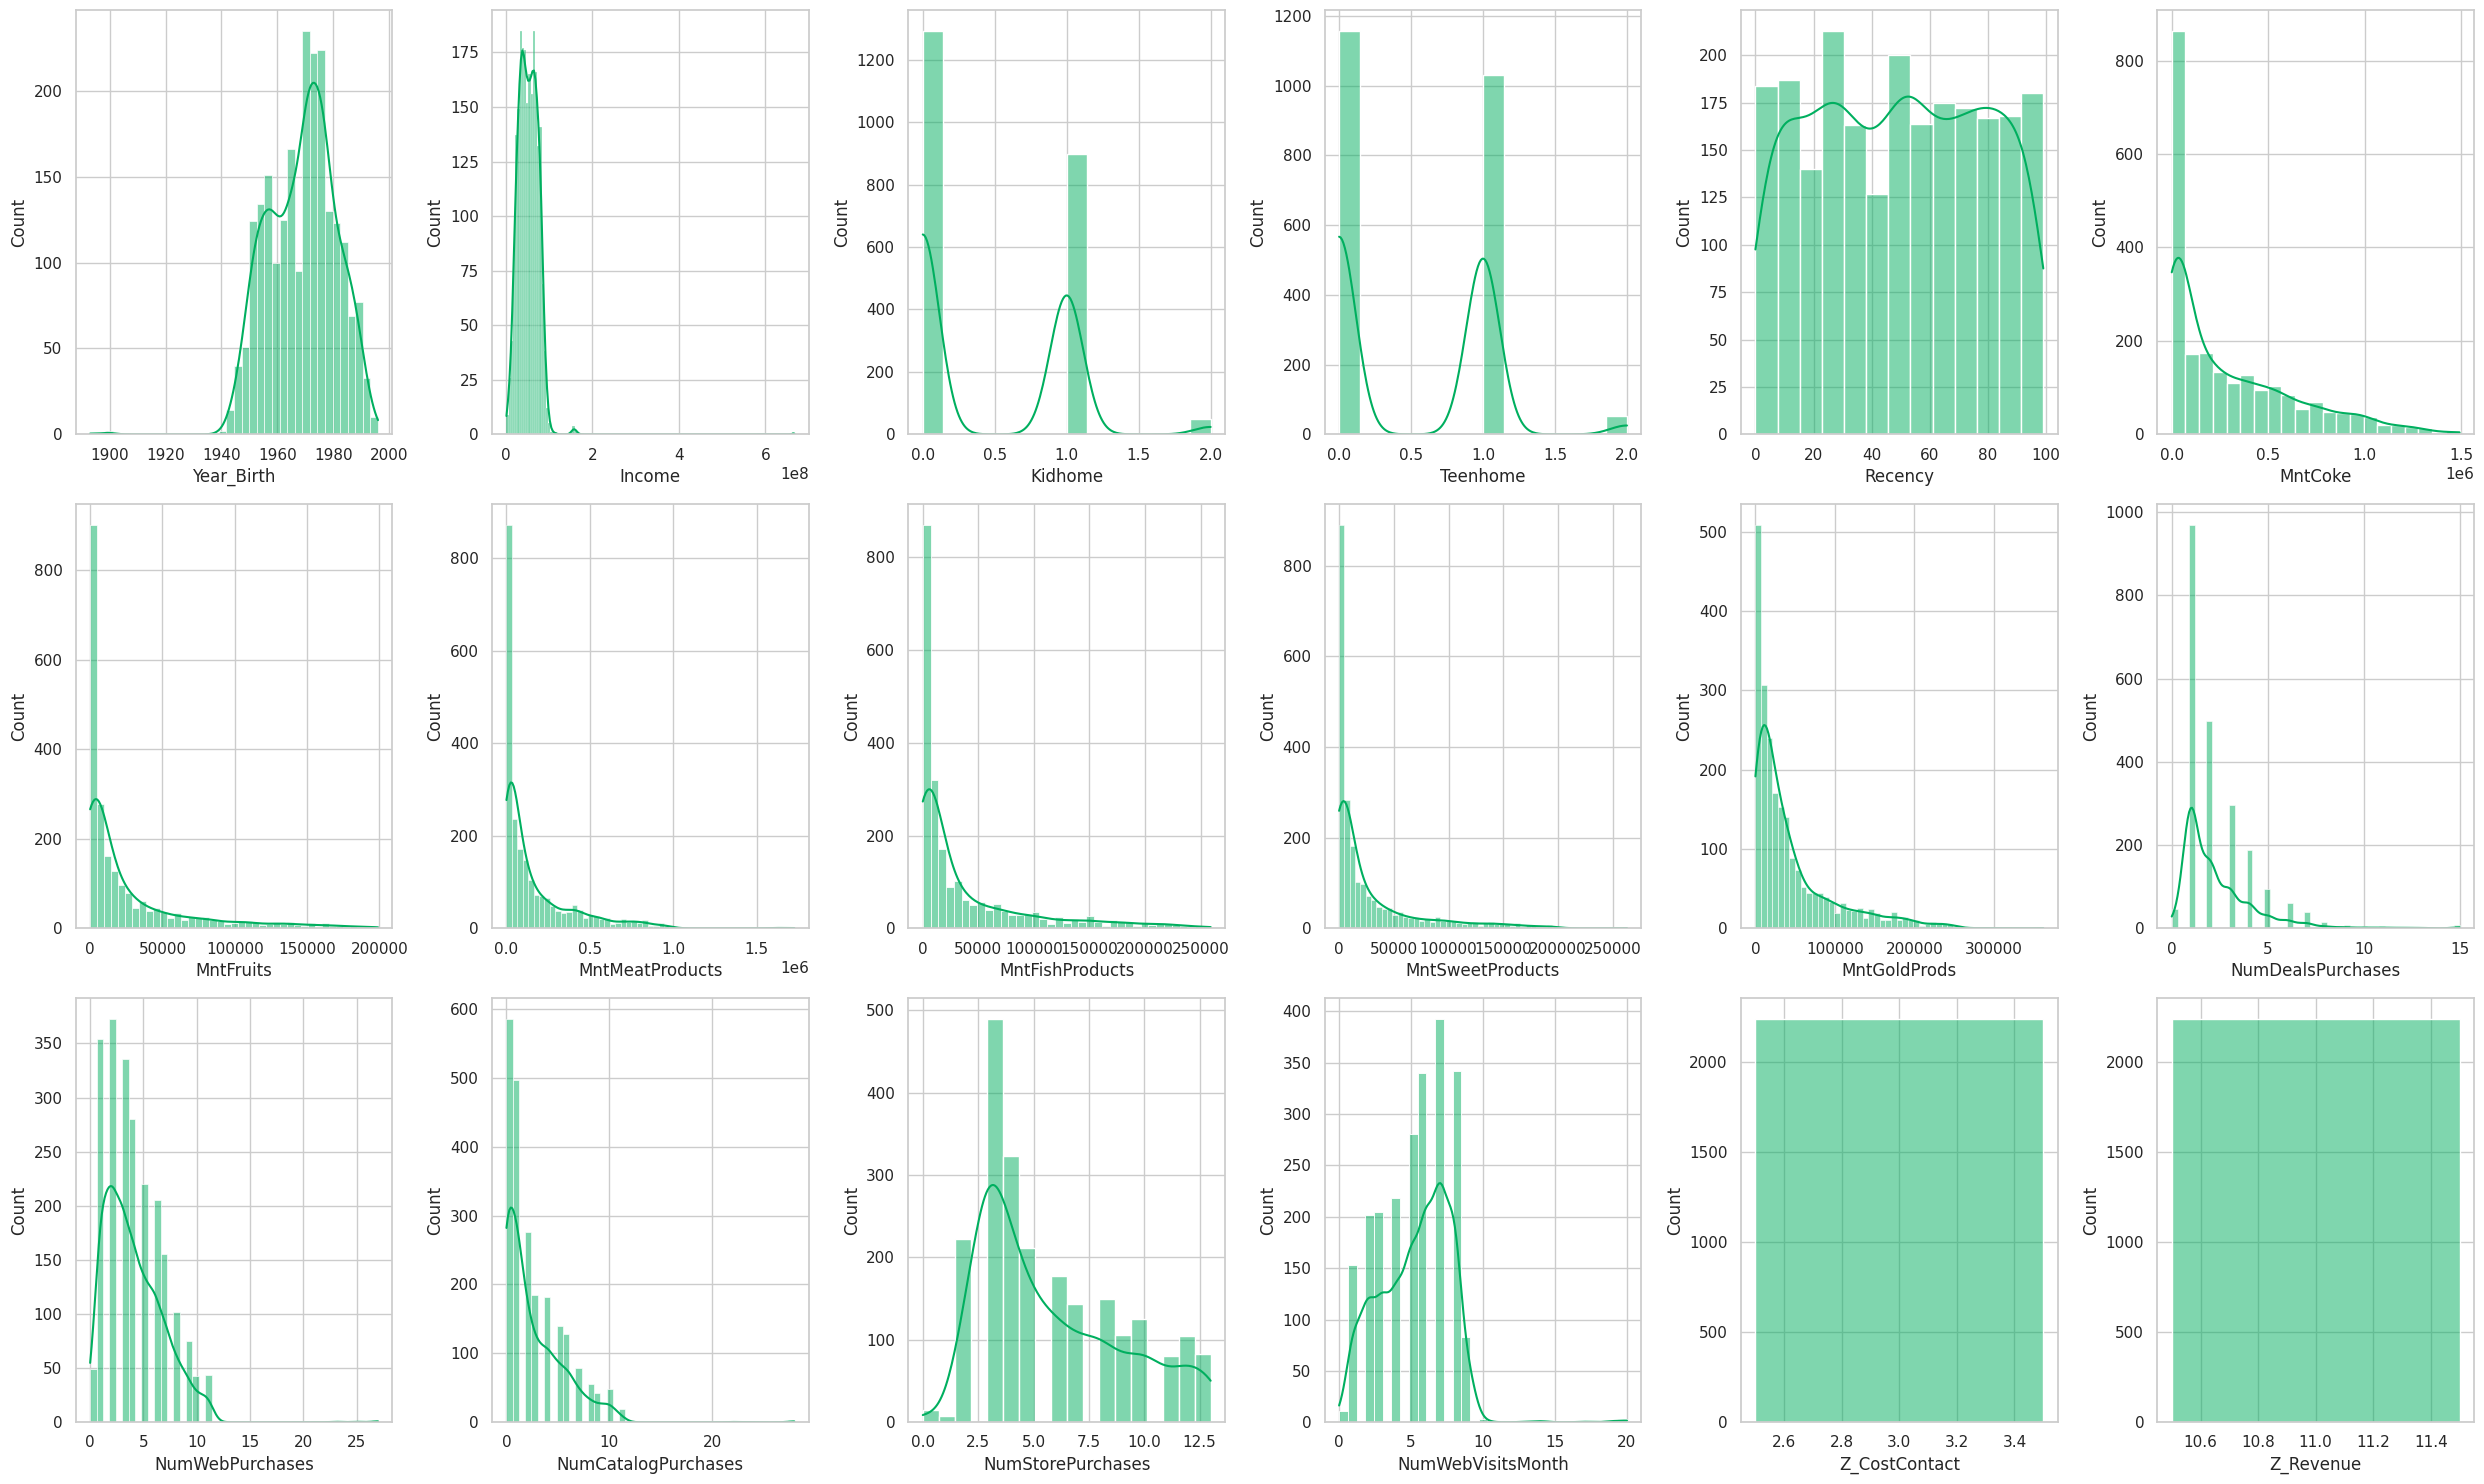

In [110]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.histplot(df[num_cols[i]], color='#00af5f', kde=True)
    plt.tight_layout()

In [111]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist

Column Name  Skewness  Kurtosis  \
0            Year_Birth    -0.350     0.713   
1                Income     6.759   159.274   
2               Kidhome     0.635    -0.781   
3              Teenhome     0.407    -0.987   
4               Recency    -0.002    -1.202   
5               MntCoke     1.175     0.595   
6             MntFruits     2.101     4.039   
7       MntMeatProducts     2.082     5.502   
8       MntFishProducts     1.918     3.087   
9      MntSweetProducts     2.135     4.364   
10         MntGoldProds     1.885     3.541   
11    NumDealsPurchases     2.417     8.914   
12      NumWebPurchases     1.382     5.688   
13  NumCatalogPurchases     1.880     8.027   
14    NumStorePurchases     0.702    -0.623   
15    NumWebVisitsMonth     0.208     1.815   
16        Z_CostContact       NaN       NaN   
17            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0   Moderately Normal Distribution (Symmetric)  
1                     Highly Positively Skewed  
2                         Bimodal Distribution  
3                         Bimodal Distribution  
4              Normal Distribution (Symmetric)  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                Moderately Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16                        Uniform Distribution  
17                        Uniform Distribution

Based on the Boxplot, Distribution and Violin graphs above, we can see that there are several variables that have outliers in them and some that have skewed distributions. Here are some of these variables:

Normal Distribution

Normal Distribution (Symmetric) Recency Normal Distribution (Symmetric)
* Year_Birth Almost Normal Distribution (Symmetric)
* Number_of_visits_month Fairly normal distribution (symmetric)

Non-uniform distribution

* Z_CostContact Uniform distribution - Has only one value
* Z_Revenue Uniform distribution - Has only one value

Positively skewed distribution

* Income Income
* Number of wine products MntCoke
* Number of fruit products MntFruit
* Number of meat products MntMeatProducts
* Number of fish products MntFishProducts
* Number of sweet products MntSweetProducts
* Number of gold products MntGoldProds
* Number of Purchase Deals NumDealsPurchases
* Number of web purchases NumWebPurchases
* Number of catalogue purchases NumCataloguePurchases
* Number of store purchases NumStorePurchases

Bimodal distribution

* Number of young children in the household of Kidhome customers
* Number of teenagers in the household of Teenhome clients

Data pre-processing recommendations:

Data with a 'positively skewed distribution' are 'log transformed' to make the data more reliable.

#### **Individual Countplot**

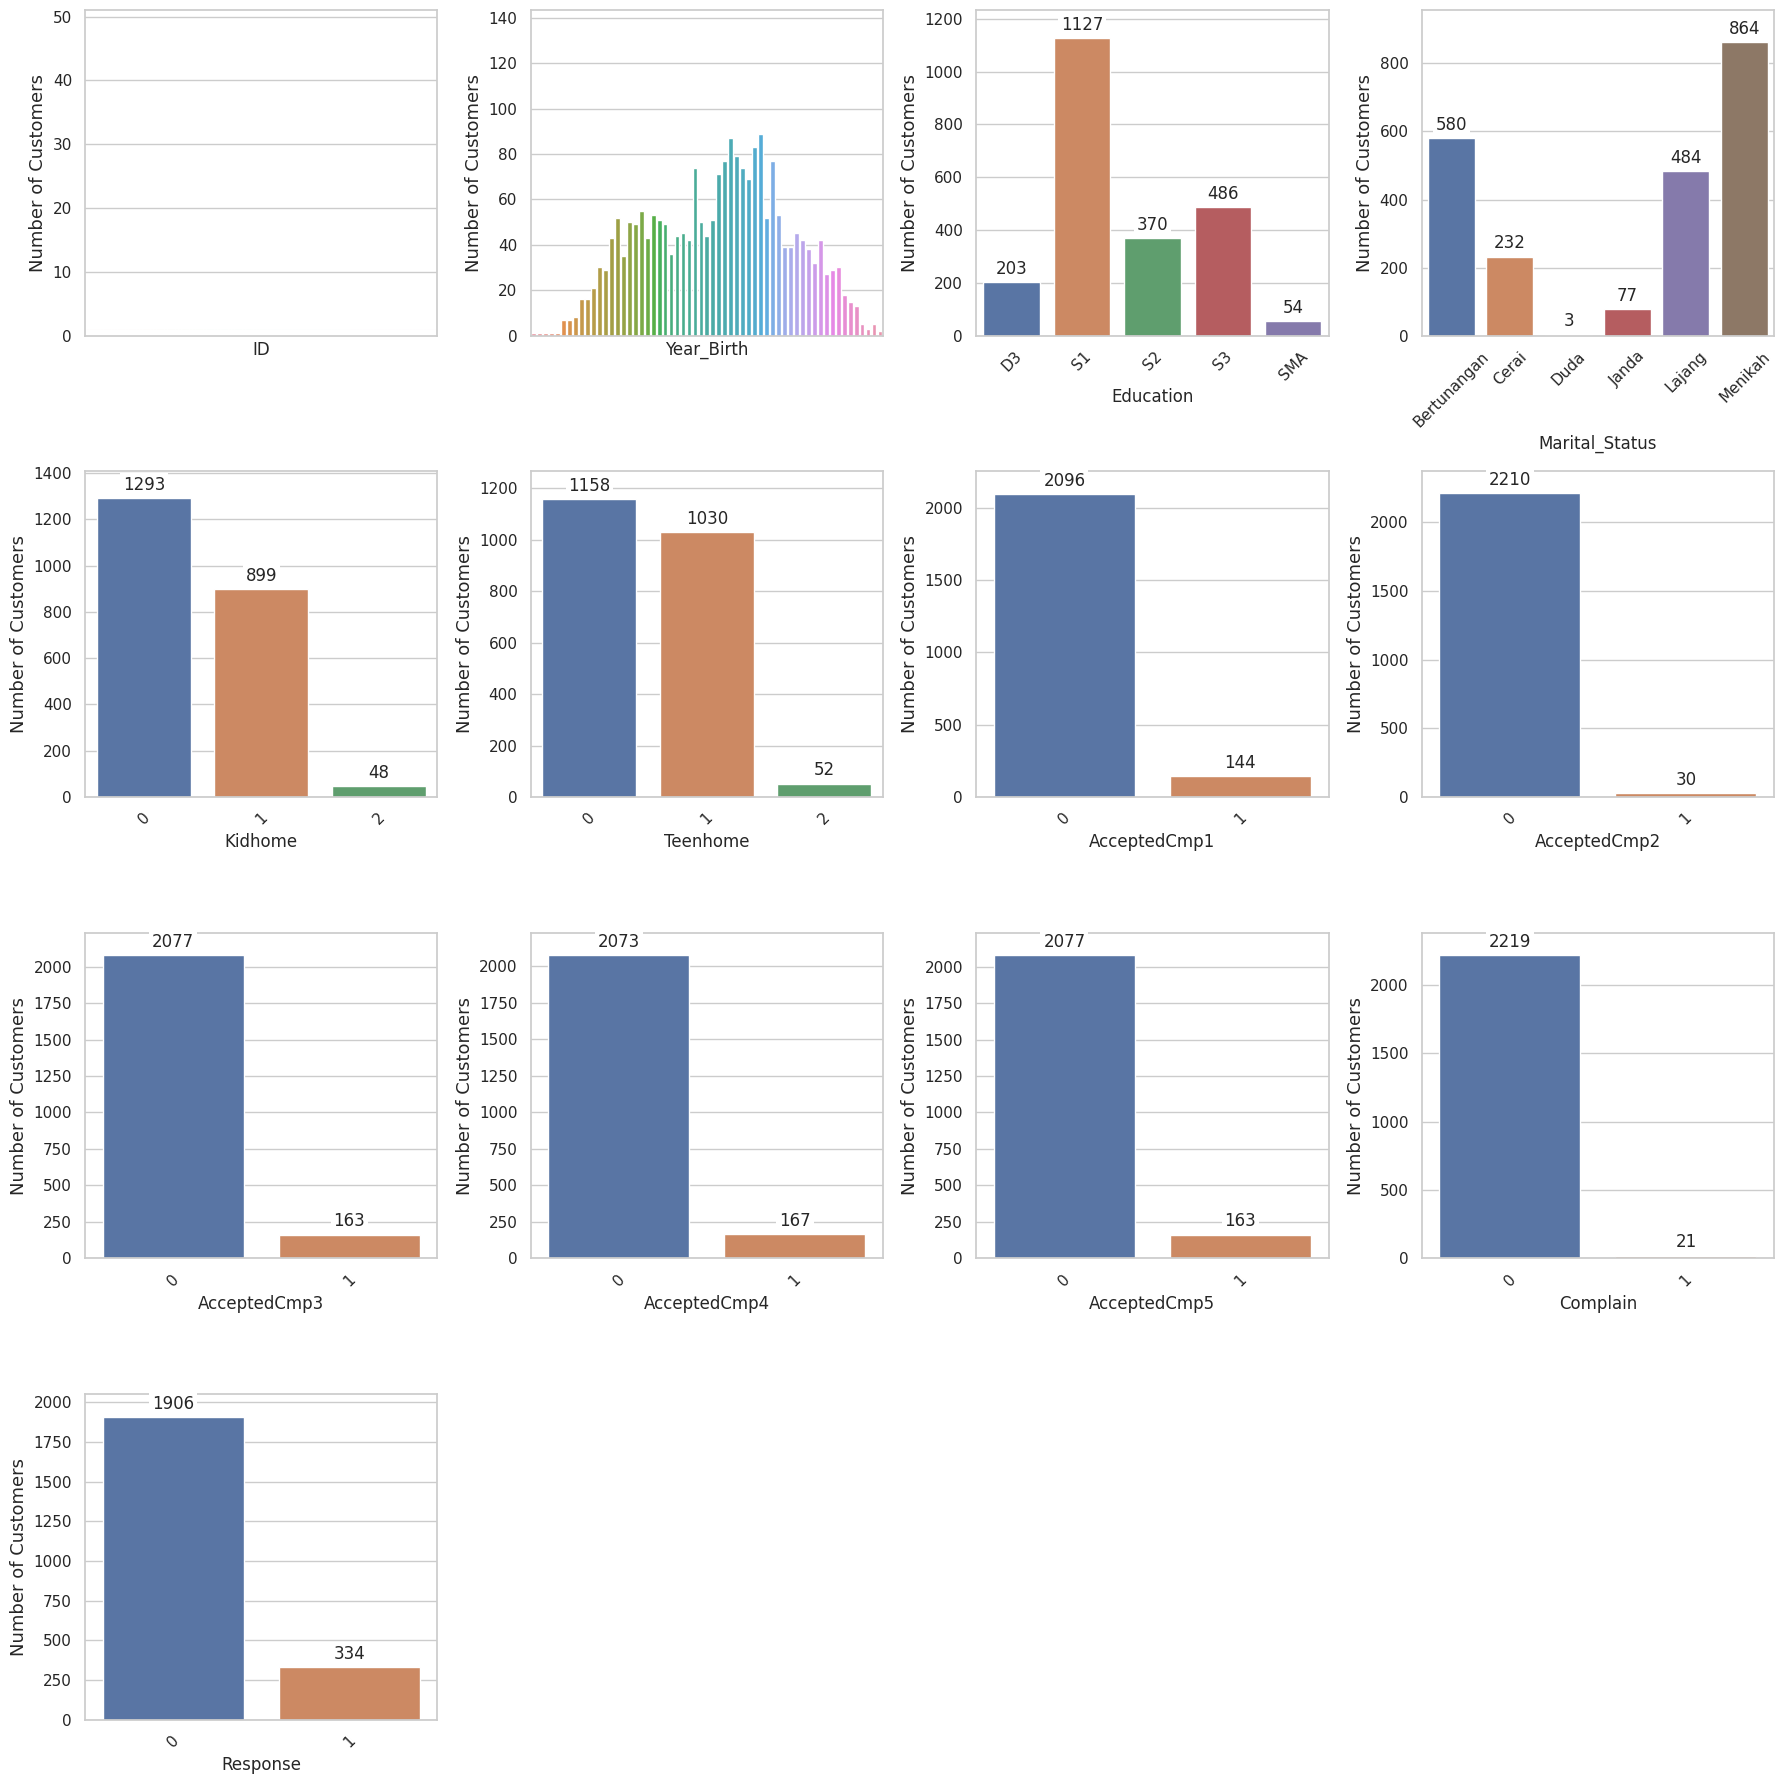

In [112]:
cat = cat_cols.copy()
cat.insert(1, "Year_Birth")
cat.insert(4, "Kidhome")
cat.insert(5, "Teenhome")

n=4
fig = plt.figure(figsize=(18, 18))
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=df[cat[i]], orient='h')
    if cat[i] not in ["ID", "Year_Birth"]:
        for i in bar.patches:
            bar.annotate(int(i.get_height()),
                    xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(facecolor='white', edgecolor="None", pad=2))
    else :
        plt.xticks([])
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=45)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

### **Multivariate Analysis**

#### **Heatmap Correlation**

In [113]:
cat = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']].astype("int64")
dfhm = pd.concat([df[num_cols], cat], axis=1)

<Axes: >

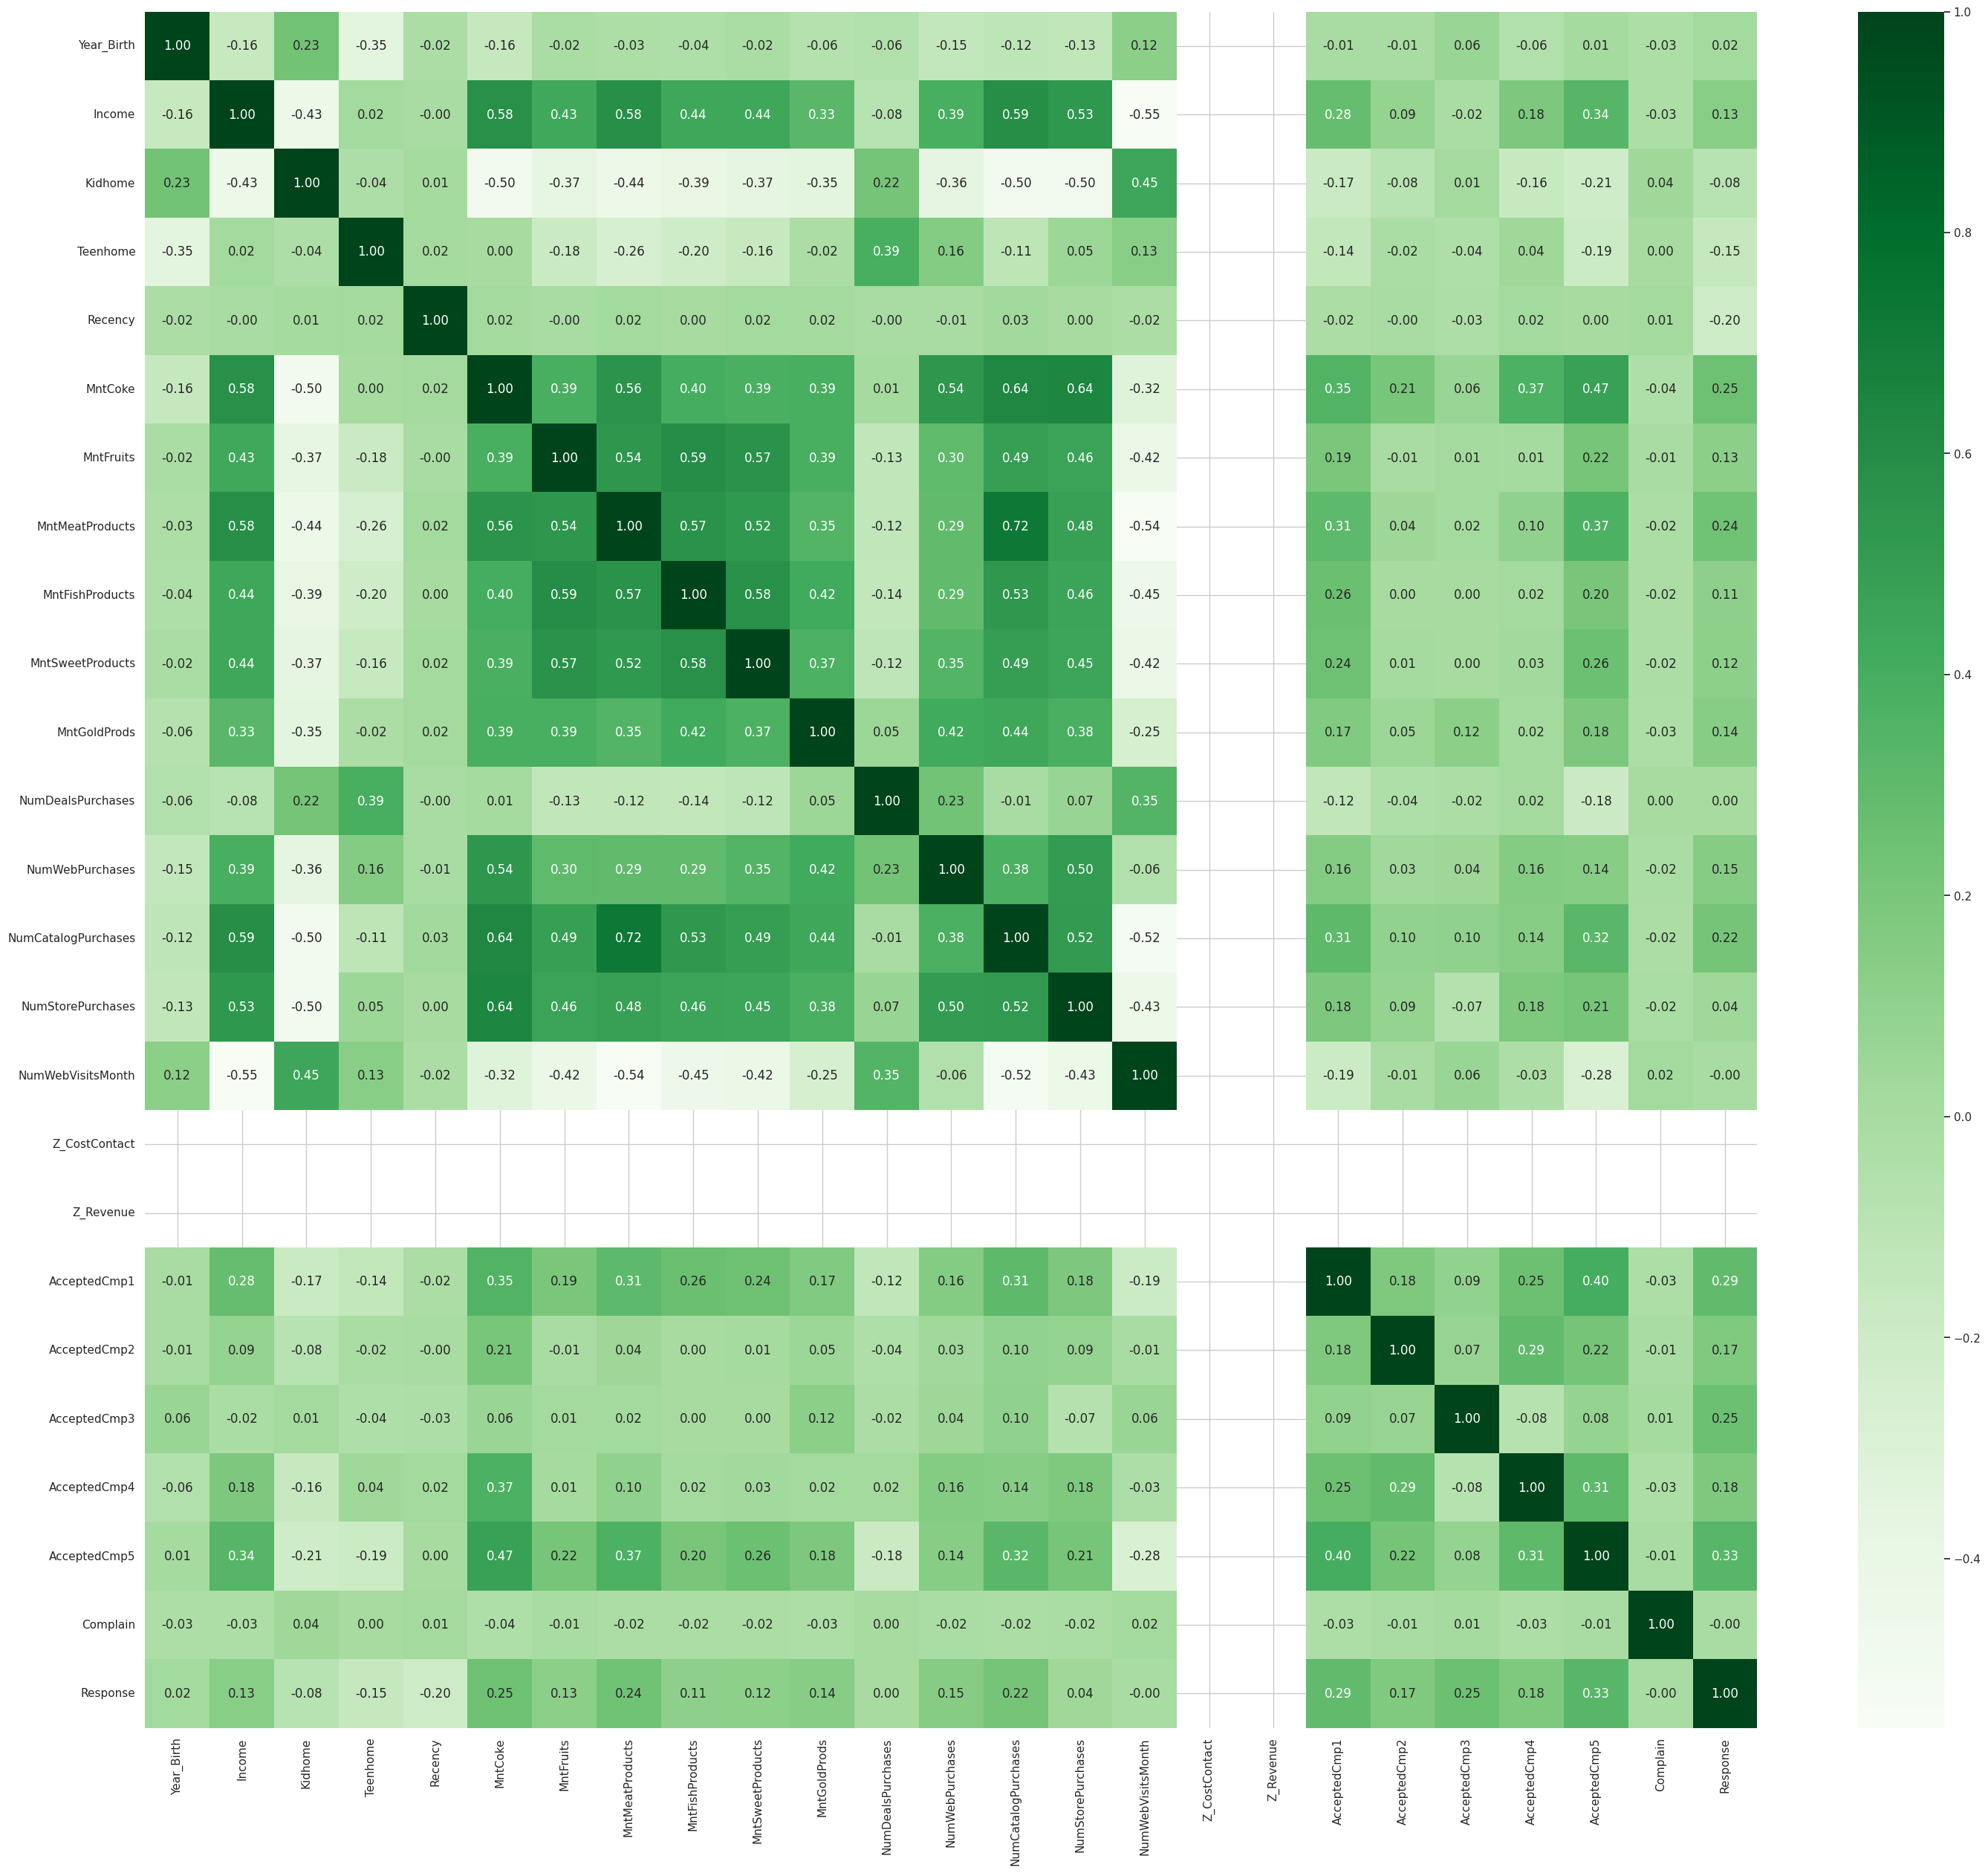

In [114]:
plt.figure(figsize=(35,30))
sns.heatmap(dfhm.corr(), cmap='Greens', annot=True, fmt='.2f')

**Checking Correlation with Target (Response)**

In [115]:
corr = dfhm.corrwith(dfhm["Response"])
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

index  corr value Corr Type
0              Response       1.000   Positif
1          AcceptedCmp5       0.327   Positif
2          AcceptedCmp1       0.294   Positif
3          AcceptedCmp3       0.254   Positif
4               MntCoke       0.247   Positif
5       MntMeatProducts       0.236   Positif
6   NumCatalogPurchases       0.221   Positif
7               Recency       0.198   Negatif
8          AcceptedCmp4       0.177   Positif
9          AcceptedCmp2       0.169   Positif
10             Teenhome       0.154   Negatif
11      NumWebPurchases       0.149   Positif
12         MntGoldProds       0.140   Positif
13               Income       0.133   Positif
14            MntFruits       0.125   Positif
15     MntSweetProducts       0.117   Positif
16      MntFishProducts       0.111   Positif
17              Kidhome       0.080   Negatif
18    NumStorePurchases       0.039   Positif
19           Year_Birth       0.021   Positif
20    NumWebVisitsMonth       0.004   Negatif
21    NumDealsPurchases       0.002   Positif
22             Complain       0.002   Negatif
23        Z_CostContact         NaN   Negatif
24            Z_Revenue         NaN   Negatif

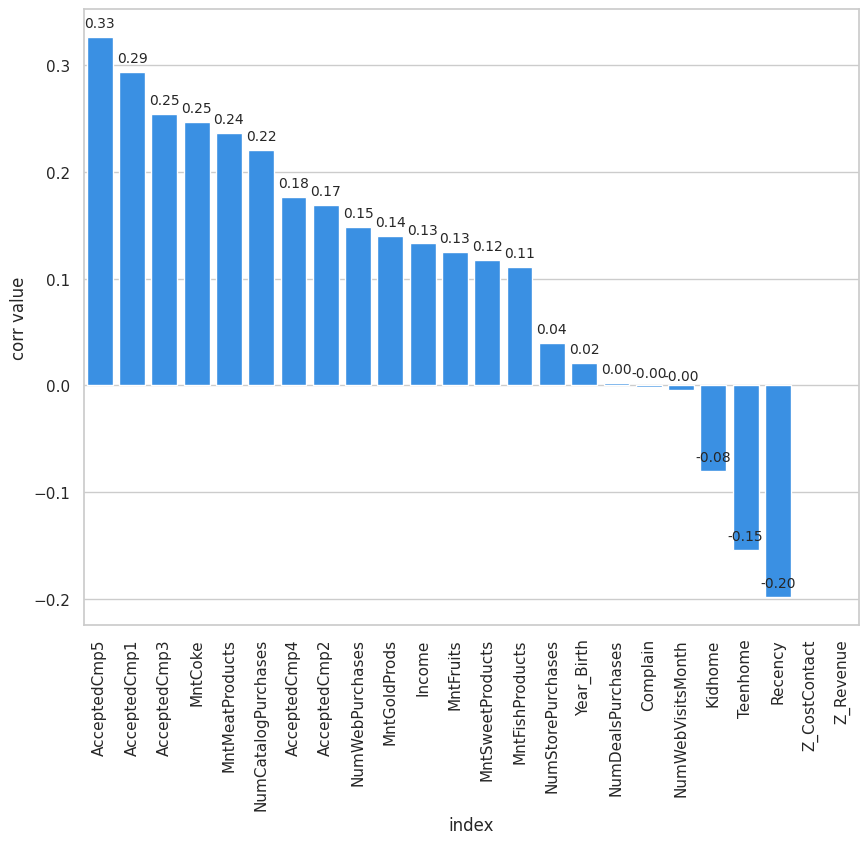

In [116]:
corr = dfhm.corrwith(dfhm["Response"])
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

#### **Pairplot**

<Figure size 1500x1500 with 0 Axes>

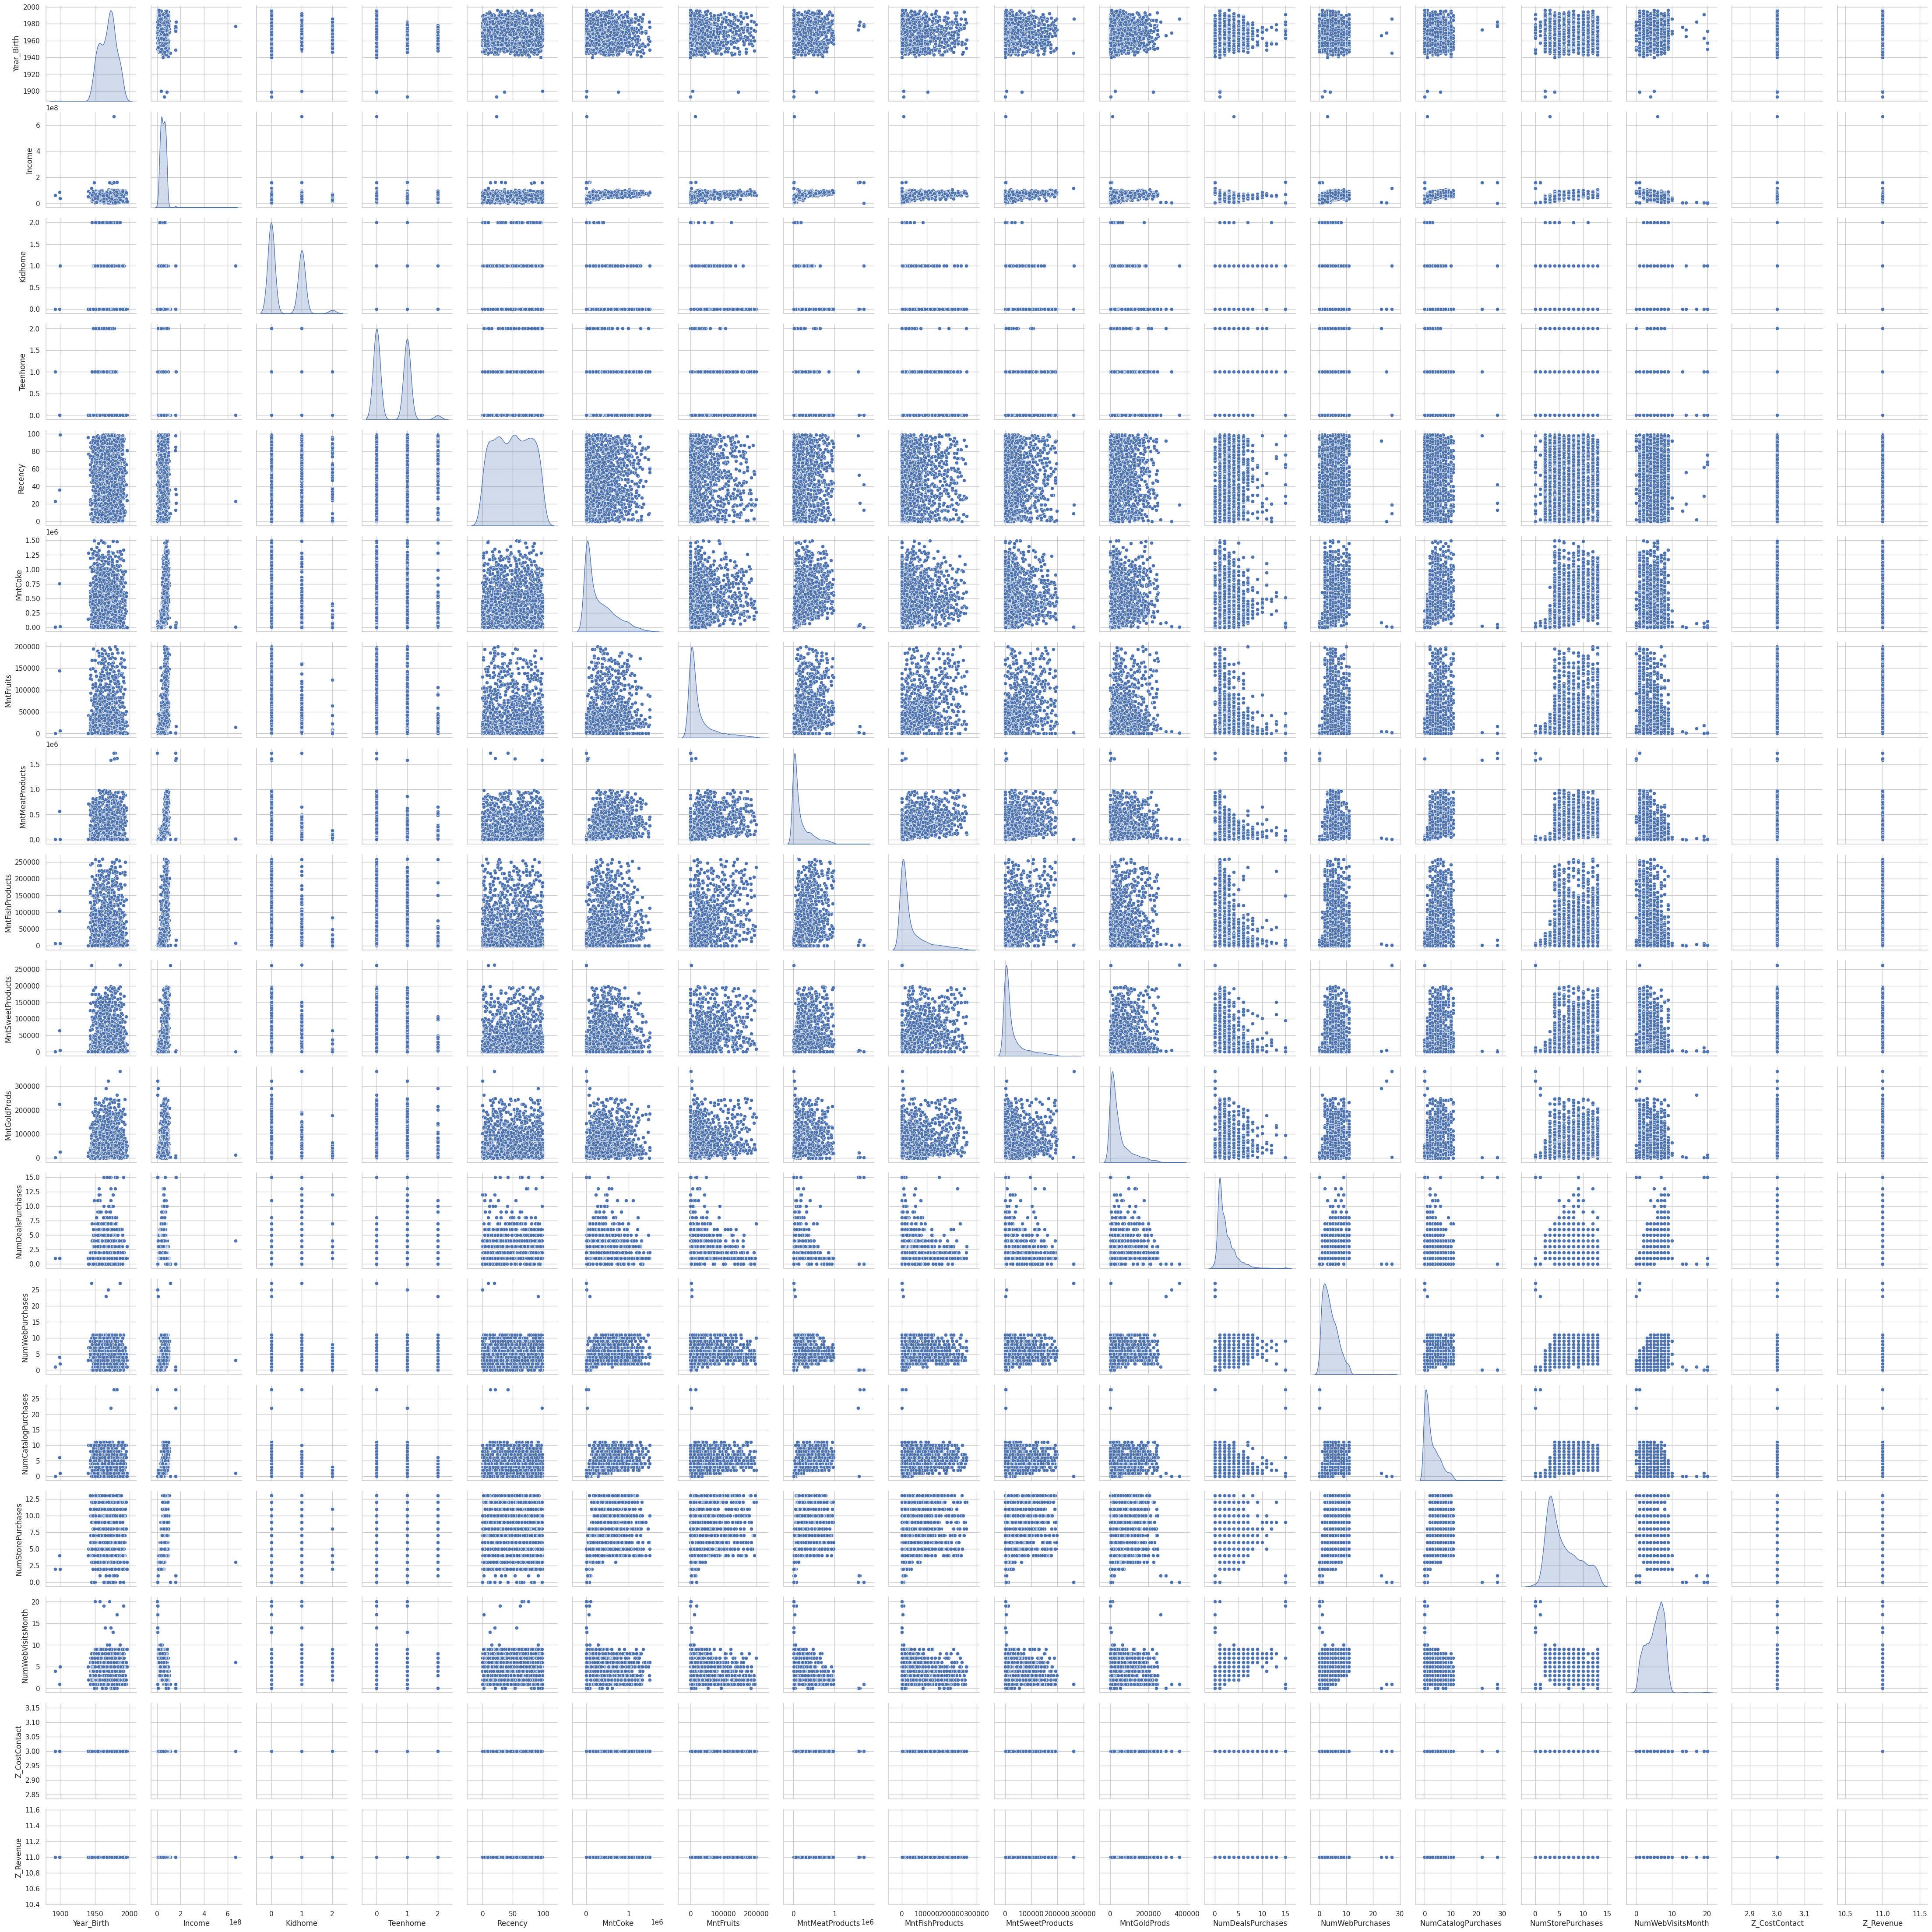

In [117]:
plt.figure(figsize=(15,15))
sns.pairplot(df[num_cols], diag_kind='kde')

# **Feature Engineering / Extraction (Business Insight)**

New Calculation, Extraction, and Binning features for business insight :
- Age Customer
- Age Group
- Has Child
- Dependents
- Month Customer
- Spending
- Total Accepted/Responses
- Education and Marital Simplify
- Income Segment
- Convertion Rate
- Total of days/years joined

**`Age`**

In [118]:
# SAS Institute, 2014
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

**`Age Group`**

In [119]:
def age_group(x):
    if x > 45:
        grup = 'Tua'
    elif x > 30:
        grup = 'Dewasa'
    else:
        grup = 'Remaja'

    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

**`Has_child`**

In [120]:
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 'Yes', 'No')

**`Dependents`**

In [121]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

**`Lifetime`**

In [122]:
df['Lifetime'] = (2014 - df.Dt_Customer.dt.year)*12 + df.Dt_Customer.dt.month

**`Spending`**

In [123]:
df['Spending']=df['MntCoke']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

**`Primer and Tersier product`**

In [124]:
# primer and tersier product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntCoke']+df['MntSweetProducts']+df["MntGoldProds"]

**`Total of Purchases`**

In [125]:
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

**`Total_Cmp`**

In [126]:
df['Total_Cmp']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

**`Ever_Accept`**

In [127]:
df['Ever_Accept']=df['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**`Total Revenue`**

In [128]:
# total revenue
df['Total_revenue'] = (df['Total_Cmp']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_revenue']].sample(5)

Z_Revenue  Total_revenue
1734         11              0
319          11             22
1465         11              0
975          11              0
1951         11              0

**`Marital_Status_Simple`**

In [129]:
df['Marital_Status_Simple'] = df['Marital_Status'].replace([ 'Janda', 'Duda'],'Cerai')
df['Marital_Status_Simple'] = df['Marital_Status_Simple'].replace(['Bertunangan','Menikah'],'Berpasangan')

In [130]:
df['Marital_Status_Simple'].unique()

['Lajang', 'Berpasangan', 'Cerai']
Categories (3, object): ['Berpasangan', 'Cerai', 'Lajang']

**`Education_Simple`**

In [131]:
df['Education_Simple'] = df['Education'].replace(['D3'],'S1')

**`Income Segmentation`**

In [132]:
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35303000.0
68522000.0


In [133]:
df["Income_sgmt"].unique()

array(['Medium', 'High', 'Low', 'None'], dtype=object)

**`Convertion Rate Web`**

In [134]:
df['Conversion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_rate_web'].fillna(0, inplace=True)
df['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**`Month and Year Joined`**

In [135]:
df['Year_joined'] = df['Dt_Customer'].dt.year
df['Month_joined'] = df['Dt_Customer'].dt.month

**`Recency_sgmt`**

In [136]:
Recency_sgmt=[]
for i in df['Recency']:
    if i <= 7  :
        Recency_sgmt.append("<= seminggu")
    elif i <= 14 :
        Recency_sgmt.append("<= 14 hari")
    elif i <= 30 :
        Recency_sgmt.append("<= sebulan")
    elif i <= 60 :
        Recency_sgmt.append("<= 2 bulan")
    else :
        Recency_sgmt.append("> 2 bulan")
df['Recency_sgmt'] = Recency_sgmt

In [137]:
df.drop(['Education','Marital_Status'], axis=1, inplace=True)

In [138]:
df.rename(columns = {'Marital_Status_Simple':'Marital_Status','Education_Simple':'Education'}, inplace = True)

**Extraction Result**

In [139]:
df.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntCoke  \
0  5524        1957 58138000        0         0  2012-04-09       58   635000   
1  2174        1954 46344000        1         1  2014-08-03       38    11000   
2  4141        1965 71613000        0         0  2013-08-21       26   426000   
3  6182        1984 26646000        1         0  2014-10-02       26    11000   
4  5324        1981 58293000        1         0  2014-01-19       94   173000   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      88000           546000           172000             88000   
1       1000             6000             2000              1000   
2      49000           127000           111000             21000   
3       4000            20000            10000              3000   
4      43000           118000            46000             27000   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         88000                  3                8                   10   
1          6000                  2                1                    1   
2         42000                  1                8                    2   
3          5000                  2                2                    0   
4         15000                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4  \
0                  4                  7            0            0   
1                  2                  5            0            0   
2                 10                  4            0            0   
3                  4                  6            0            0   
4                  6                  5            0            0   

  AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain  Z_CostContact  Z_Revenue  \
0            0            0            0        0              3         11   
1            0            0            0        0              3         11   
2            0            0            0        0              3         11   
3            0            0            0        0              3         11   
4            0            0            0        0              3         11   

  Response  Age Age_group Has_child  Dependents  Lifetime  Spending  \
0        1   57       Tua        No           0        28   1617000   
1        0   60       Tua       Yes           2         8     27000   
2        0   49       Tua        No           0        20    776000   
3        0   30    Remaja       Yes           1        10     53000   
4        0   33    Dewasa       Yes           1         1    422000   

   Primer_purchase  Tersier_purchase  Total_Purchases  Total_Cmp  Ever_Accept  \
0           806000            811000               25          0            0   
1             9000             18000                6          0            0   
2           287000            489000               21          0            0   
3            34000             19000                8          0            0   
4           207000            215000               19          0            0   

   Total_revenue Marital_Status Education Income_sgmt  Conversion_rate_web  \
0              0         Lajang        S1      Medium                3.570   
1              0         Lajang        S1      Medium                1.200   
2              0    Berpasangan        S1        High                5.250   
3              0    Berpasangan        S1         Low                1.330   
4              0    Berpasangan        S3      Medium                3.800   

   Year_joined  Month_joined Recency_sgmt  
0         2012             4   <= 2 bulan  
1         2014             8   <= 2 bulan  
2         2013             8   <= sebulan  
3         2014            10   <= sebulan  
4         2014             1    > 2 bulan

# **BUSINESS INSIGHT**

### **Response Ratio**

In [140]:
a = df['Response'].value_counts()/len(df['Response'])
response_ratio =  pd.DataFrame(a).T
response_ratio = response_ratio.rename(columns={0:'No Response' , 1:'Response'})
response_ratio.style.background_gradient(cmap='Blues')

In [141]:
# table
response_grp = df.groupby('Response').size().reset_index()
response_grp.columns = ['Response','total']
response_grp['%'] = round(response_grp['total']*100/sum(response_grp['total']),2)
response_grp.sort_values(by='total', ascending=False).style.background_gradient(cmap='Blues')

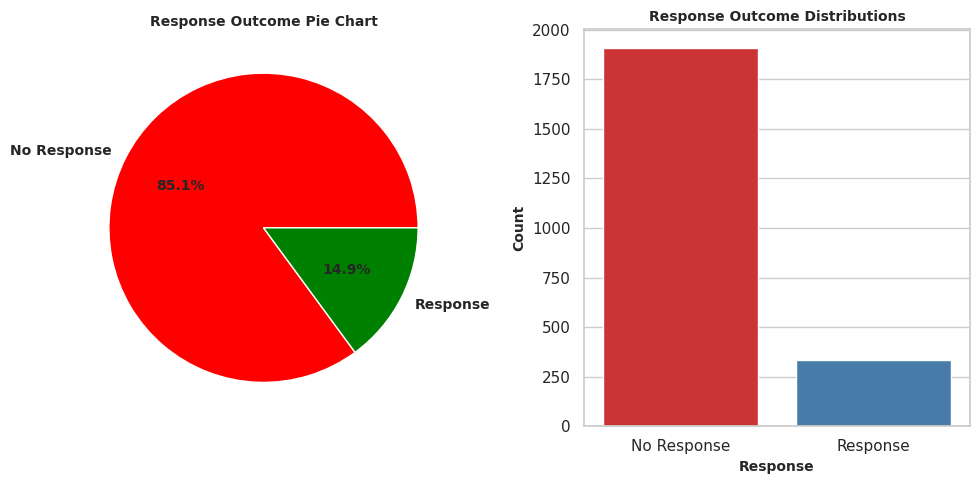

In [149]:
fig = plt.figure(figsize = (10, 5))
colors=['Red','Green']

plt.subplot(121)
plt.pie(df["Response"].value_counts(),
        labels = ['No Response', 'Response'],
        autopct = '%.1f%%',
        radius = 1,
        colors=colors,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = df["Response"].apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette='Set1')
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

### **Acceptance Rate for each Campaign (1-5)**

In [143]:
# Membuat Acceptance Rate dari setiap campaign
cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

nm = []
acc_pcnt = []

for i, val in enumerate(cmp):
    acc = (df[val].astype("int64").sum()/df.shape[0]) * 100
    nm.append(i+1)
    acc_pcnt.append(acc)

df_acc = pd.DataFrame({'Campaign': nm, 'Acceptance Percentage': acc_pcnt})
df_acc

Campaign  Acceptance Percentage
0         1                  6.429
1         2                  1.339
2         3                  7.277
3         4                  7.455
4         5                  7.277

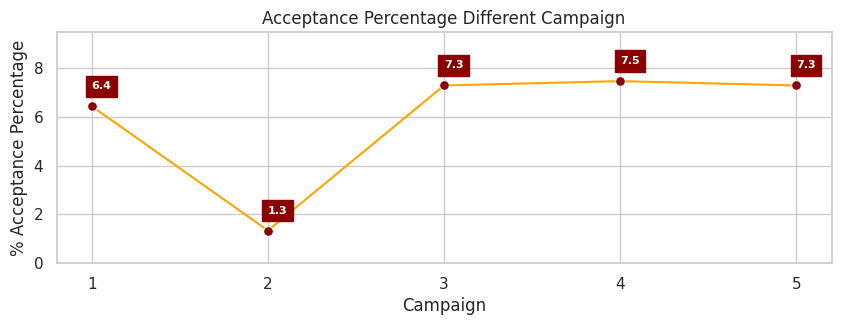

In [144]:
plt.figure(figsize=(10, 3))
line = sns.lineplot(x="Campaign", y="Acceptance Percentage", data=df_acc,
                    marker='o', color='orange', markersize=7, markerfacecolor='darkred')

# label points on the plot
for x, y in zip(df_acc["Campaign"], df_acc["Acceptance Percentage"]):
    plt.text(x = x, y = y+0.7, s = "{:.1f}".format(y), color = "white", size=8, fontweight="bold").set_backgroundcolor("darkred")

# Set plot title and axes labels
plt.title('Acceptance Percentage Different Campaign')
plt.xlabel('Campaign')
plt.ylabel('% Acceptance Percentage')
plt.ylim(0, max(df_acc["Acceptance Percentage"])+2)

plt.xticks(np.arange(1, 6, step=1))

plt.show()

### **Birth Year / Age vs. Response**

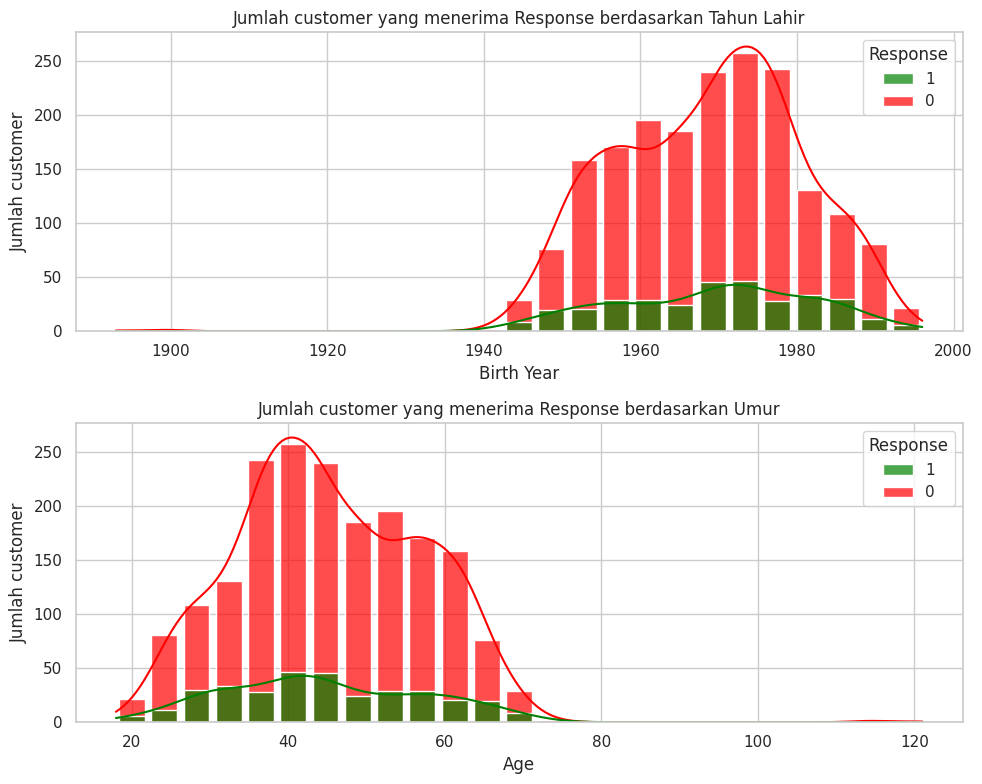

In [145]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
colors=['Green','Red']

sns.histplot(data=df, x='Year_Birth', hue='Response',
             palette=colors, alpha=0.7,
             kde = True, bins = 25, shrink = 0.8,
            hue_order=[1,0], ax=ax[0])
ax[0].set_xlabel('Birth Year')
ax[0].set_ylabel('Jumlah customer')
ax[0].set_title('Jumlah customer yang menerima Response berdasarkan Tahun Lahir')

sns.histplot(data=df, x='Age', hue='Response',
             palette=colors, alpha=0.7,
             kde = True, bins = 25, shrink = 0.8,
            hue_order=[1,0], ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Jumlah customer')
ax[1].set_title('Jumlah customer yang menerima Response berdasarkan Umur')

plt.tight_layout()
plt.show()

### **Age Group vs. Response**

In [152]:

# group data by Age_group & Response
dfg1 = df.groupby(["Age_group", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

# group data by Age_group
dfg2 = df.groupby(["Age_group"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

# merge data
df_aggr = dfg1.merge(dfg2, on="Age_group")

# calculate ratio
df_aggr["ratio"] = (df_aggr["nCustomer"]/df_aggr["nAllCustomer"])*100

# change 1 0 category to Yes No
df_aggr["Response"] = df_aggr["Response"].apply(lambda x: "Yes" if x == 1 else "No")

order = ["Tua", "Dewasa", "Remaja"]
df_aggr = df_aggr.set_index("Age_group").loc[order].reset_index()
df_aggr

Age_group Response  nCustomer  nAllCustomer  ratio
0       Tua       No        867          1005 86.269
1       Tua      Yes        138          1005 13.731
2    Dewasa       No        827           976 84.734
3    Dewasa      Yes        149           976 15.266
4    Remaja       No        212           259 81.853
5    Remaja      Yes         47           259 18.147

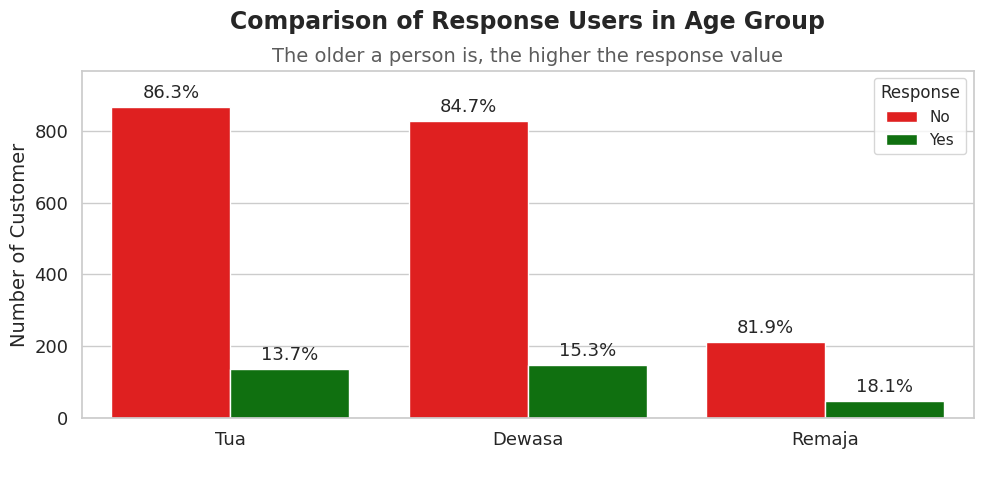

In [153]:
# plotting
plt.figure(figsize=(10,5))

colors=['Red','Green']
ax = sns.barplot(x="Age_group", y="nCustomer",
                 data=df_aggr, hue="Response",
                 palette= colors)

# set values label annotation
for p in ax.patches:
    ncus = df_aggr[df_aggr["nCustomer"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize = 13,
        textcoords = 'offset points')

# set title
plt.ylabel('Number of Customer', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Age Group",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "The older a person is, the higher the response value"
ax.text((x_start+x_end)/2, y_end*1.09, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

# settings legend
lg = plt.legend(title="Response", prop = {"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_aggr["nCustomer"])+100)

plt.tight_layout()
plt.show()

### **Education vs. Response**

In [154]:
# your code goes here!

# group data by Education_Simple & Response
dfg1 = df.groupby(["Education", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

# group data by Education_Simple
dfg2 = df.groupby(["Education"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

# merge data
df_edu = dfg1.merge(dfg2, on="Education")

# calculate ratio
df_edu["ratio"] = (df_edu["nCustomer"]/df_edu["nAllCustomer"])*100

# change 1 0 category to Yes No
df_edu["Response"] = df_edu["Response"].apply(lambda x: "Yes" if x == 1 else "No")

order = ['SMA', 'S1', 'S2', 'S3']
df_edu = df_edu.set_index("Education").loc[order].reset_index()
df_edu

Education Response  nCustomer  nAllCustomer  ratio
0       SMA       No         52            54 96.296
1       SMA      Yes          2            54  3.704
2        S1       No       1156          1330 86.917
3        S1      Yes        174          1330 13.083
4        S2       No        313           370 84.595
5        S2      Yes         57           370 15.405
6        S3       No        385           486 79.218
7        S3      Yes        101           486 20.782

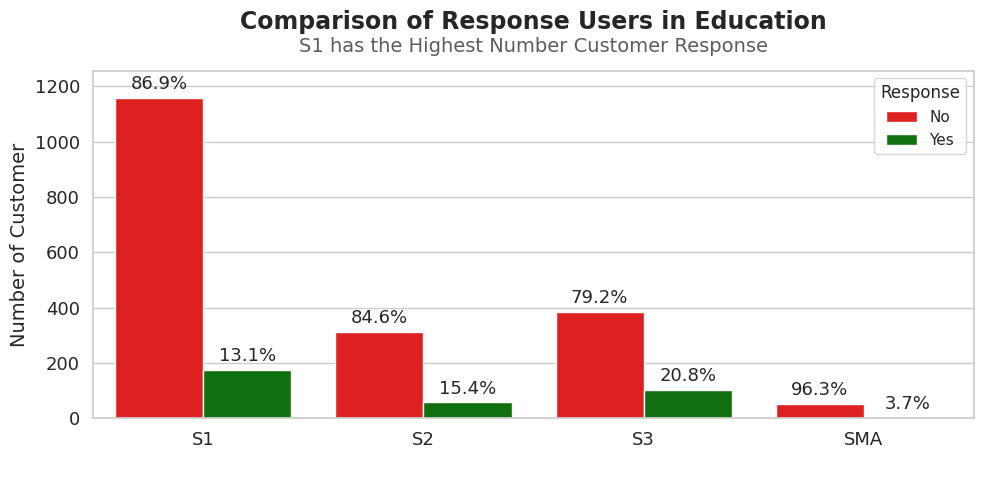

In [156]:
# plotting
plt.figure(figsize=(10,5))

colors=['Red','Green']
ax = sns.barplot(x="Education", y="nCustomer",
                 data=df_edu, hue="Response",
                 palette= colors)

# set values label annotation
for p in ax.patches:
    ncus = df_edu[df_edu["nCustomer"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize = 13,
        textcoords = 'offset points')

# set title
plt.ylabel('Number of Customer', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Education",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "S1 has the Highest Number Customer Response"
ax.text((x_start+x_end)/2, y_end*1.09, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

# settings legend
lg = plt.legend(title="Response", prop = {"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_edu["nCustomer"])+100)

plt.tight_layout()
plt.show()

In [157]:
df_resp_yes = df[df['Response'] == 1]
dfg = df_resp_yes.groupby("Education").agg({"ID":"nunique"}) \
        .sort_values("ID", ascending=False) \
        .reset_index()
dfg.columns = ["Education", "NumCust"]
dfg

Education  NumCust
0        S1      174
1        S3      101
2        S2       57
3       SMA        2

### **Marital Status vs Response**

In [160]:
# your code goes here!

# group data by Marital_Status_Simple & Response
dfg1 = df.groupby(["Marital_Status", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

# group data by Marital_Status_Simple
dfg2 = df.groupby(["Marital_Status"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

# merge data
df_mar = dfg1.merge(dfg2, on="Marital_Status")

# calculate ratio
df_mar["ratio"] = (df_mar["nCustomer"]/df_mar["nAllCustomer"])*100

# change 1 0 category to Yes No
df_mar["Response"] = df_mar["Response"].apply(lambda x: "Yes" if x == 1 else "No")

order = ['Lajang','Berpasangan','Cerai']
df_mar = df_mar.set_index("Marital_Status").loc[order].reset_index()
df_mar

Marital_Status Response  nCustomer  nAllCustomer  ratio
0         Lajang       No        376           484 77.686
1         Lajang      Yes        108           484 22.314
2    Berpasangan       No       1286          1444 89.058
3    Berpasangan      Yes        158          1444 10.942
4          Cerai       No        244           312 78.205
5          Cerai      Yes         68           312 21.795

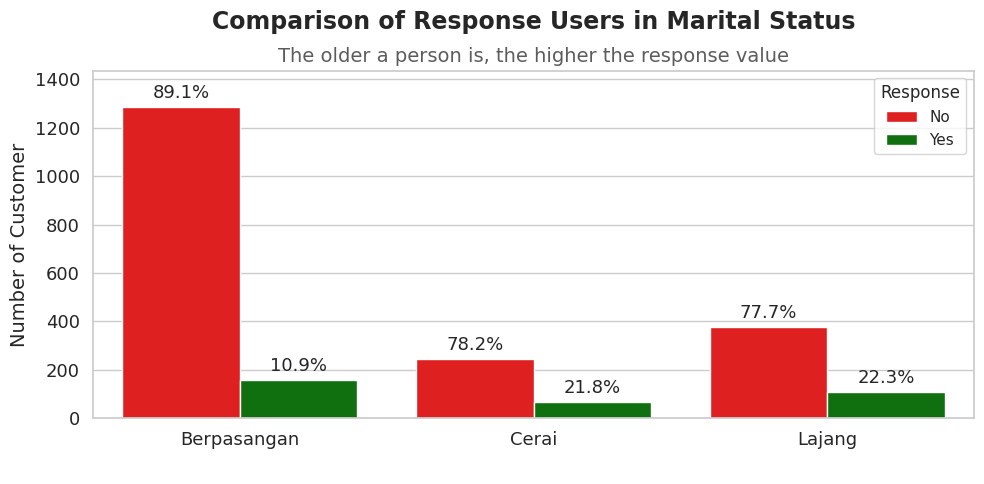

In [162]:
# plotting
plt.figure(figsize=(10,5))

colors=['Red','Green']
ax = sns.barplot(x="Marital_Status", y="nCustomer",
                 data=df_mar, hue="Response",
                 palette= colors)

# set values label annotation
for p in ax.patches:
    ncus = df_mar[df_mar["nCustomer"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize = 13,
        textcoords = 'offset points')

# set title
plt.ylabel('Number of Customer', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Marital Status",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "The older a person is, the higher the response value"
ax.text((x_start+x_end)/2, y_end*1.09, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

# settings legend
lg = plt.legend(title="Response", prop = {"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_mar["nCustomer"])+150)

plt.tight_layout()
plt.show()

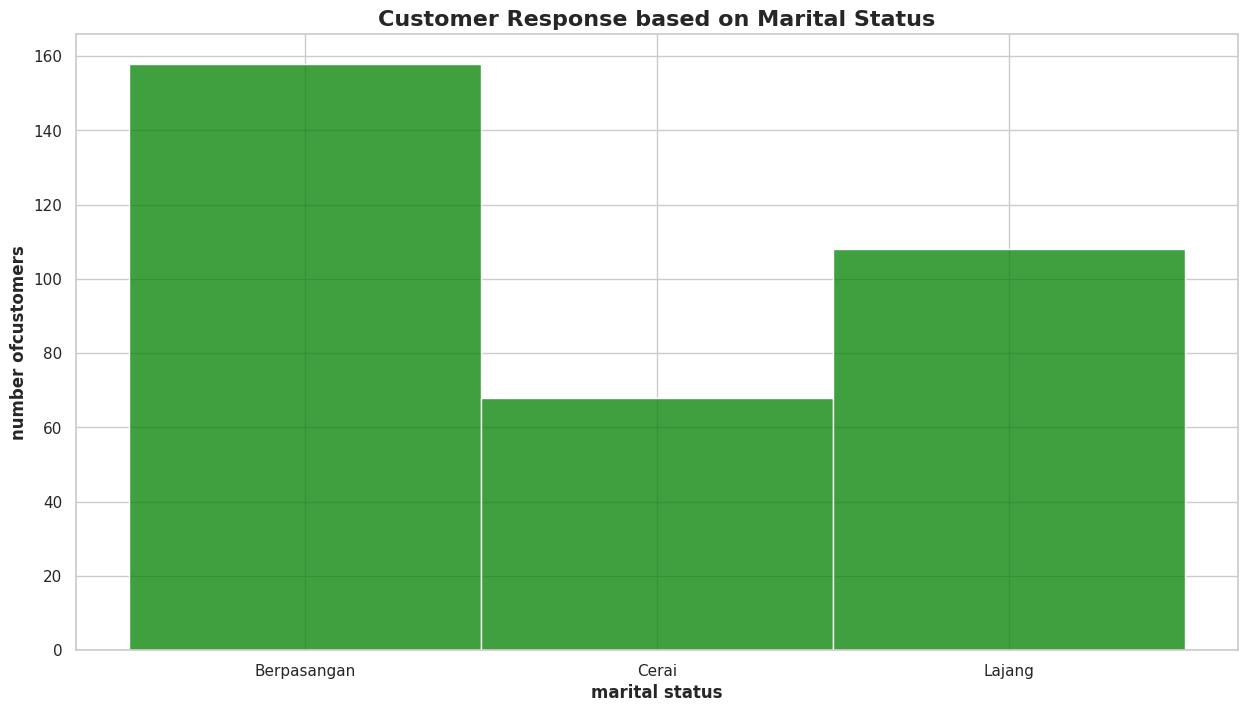

In [163]:
df_resp_yes = df[df['Response'] == 1]
sns.histplot(data=df_resp_yes, x='Marital_Status', color='green')
plt.xlabel('marital status',fontsize=12, fontweight = 'bold')
plt.ylabel('number ofcustomers',fontsize=12, fontweight = 'bold')
plt.title('Customer Response based on Marital Status',fontsize=16,fontweight = 'bold')
plt.show()

### **Recency vs. Response**

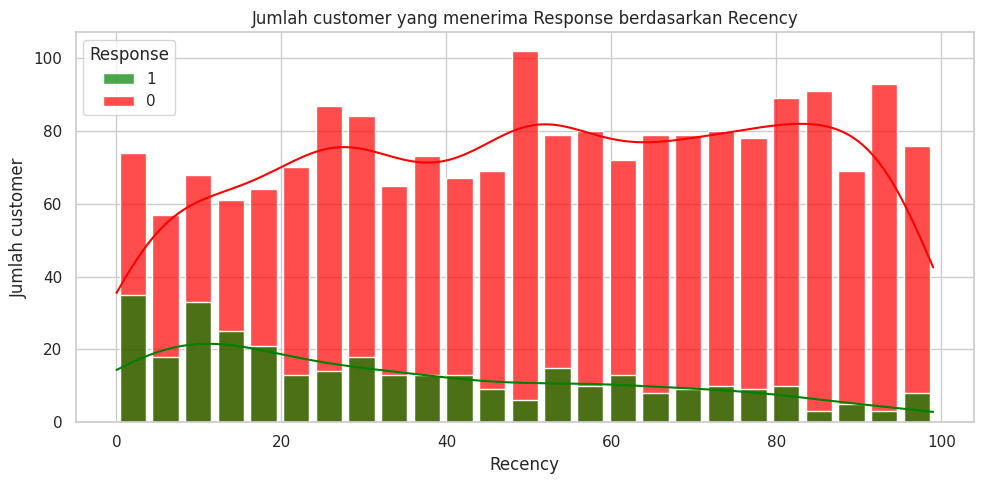

In [165]:
fig = plt.figure(figsize = (10, 5))
colors=['Green','Red']

ax = sns.histplot(data=df, x='Recency', hue='Response',
             palette=colors, alpha=0.7,
             kde = True,
             bins = 25, shrink = 0.8,
            hue_order=[1,0])
plt.xlabel('Recency')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Recency')

plt.tight_layout()
plt.show()

In [166]:
# your code goes here!

# group data by Recency_sgmt & Response
dfg1 = df.groupby(["Recency_sgmt", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

# group data by Recency_sgmt
dfg2 = df.groupby(["Recency_sgmt"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

# merge data
df_rc = dfg1.merge(dfg2, on="Recency_sgmt")

# calculate ratio
df_rc["ratio"] = (df_rc["nCustomer"]/df_rc["nAllCustomer"])*100

# change 1 0 category to Yes No
df_rc["Response"] = df_rc["Response"].apply(lambda x: "Yes" if x == 1 else "No")
order = ["<= seminggu", "<= 14 hari", "<= sebulan", "<= 2 bulan", "> 2 bulan"]
df_rc = df_rc.set_index("Recency_sgmt").loc[order].reset_index()
df_rc

Recency_sgmt Response  nCustomer  nAllCustomer  ratio
0  <= seminggu       No        131           184 71.196
1  <= seminggu      Yes         53           184 28.804
2   <= 14 hari       No        118           171 69.006
3   <= 14 hari      Yes         53           171 30.994
4   <= sebulan       No        302           369 81.843
5   <= sebulan      Yes         67           369 18.157
6   <= 2 bulan       No        565           654 86.391
7   <= 2 bulan      Yes         89           654 13.609
8    > 2 bulan       No        790           862 91.647
9    > 2 bulan      Yes         72           862  8.353

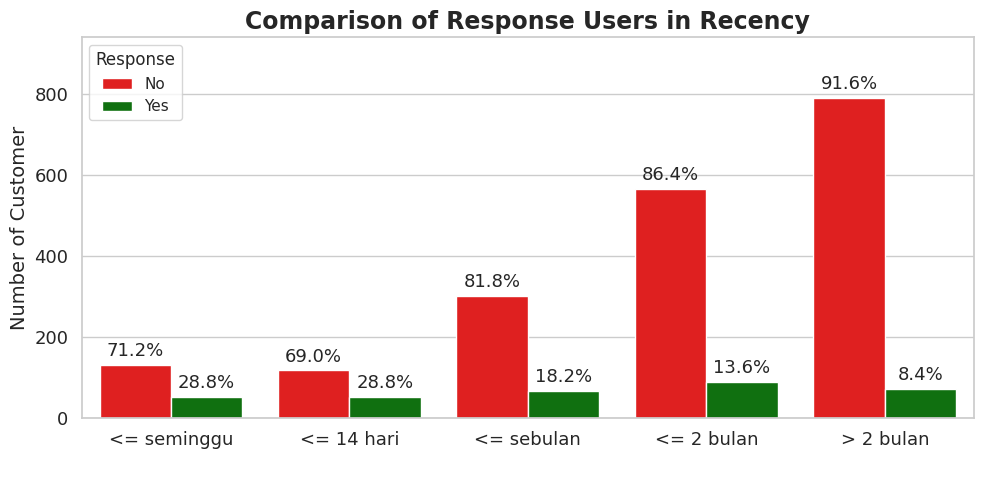

In [168]:
# plotting
plt.figure(figsize=(10,5))

colors=['Red','Green']
ax = sns.barplot(x="Recency_sgmt", y="nCustomer",
                 data=df_rc, hue="Response",
                 palette= colors)

# set values label annotation
for p in ax.patches:
    ncus = df_rc[df_rc["nCustomer"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize = 13,
        textcoords = 'offset points')

# set title
plt.ylabel('Number of Customer', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Recency",
          fontsize=17, fontweight='bold')

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

# settings legend
lg = plt.legend(title="Response", prop = {"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_rc["nCustomer"])+150)

plt.tight_layout()
plt.show()

### **Purchase type vs. Response**

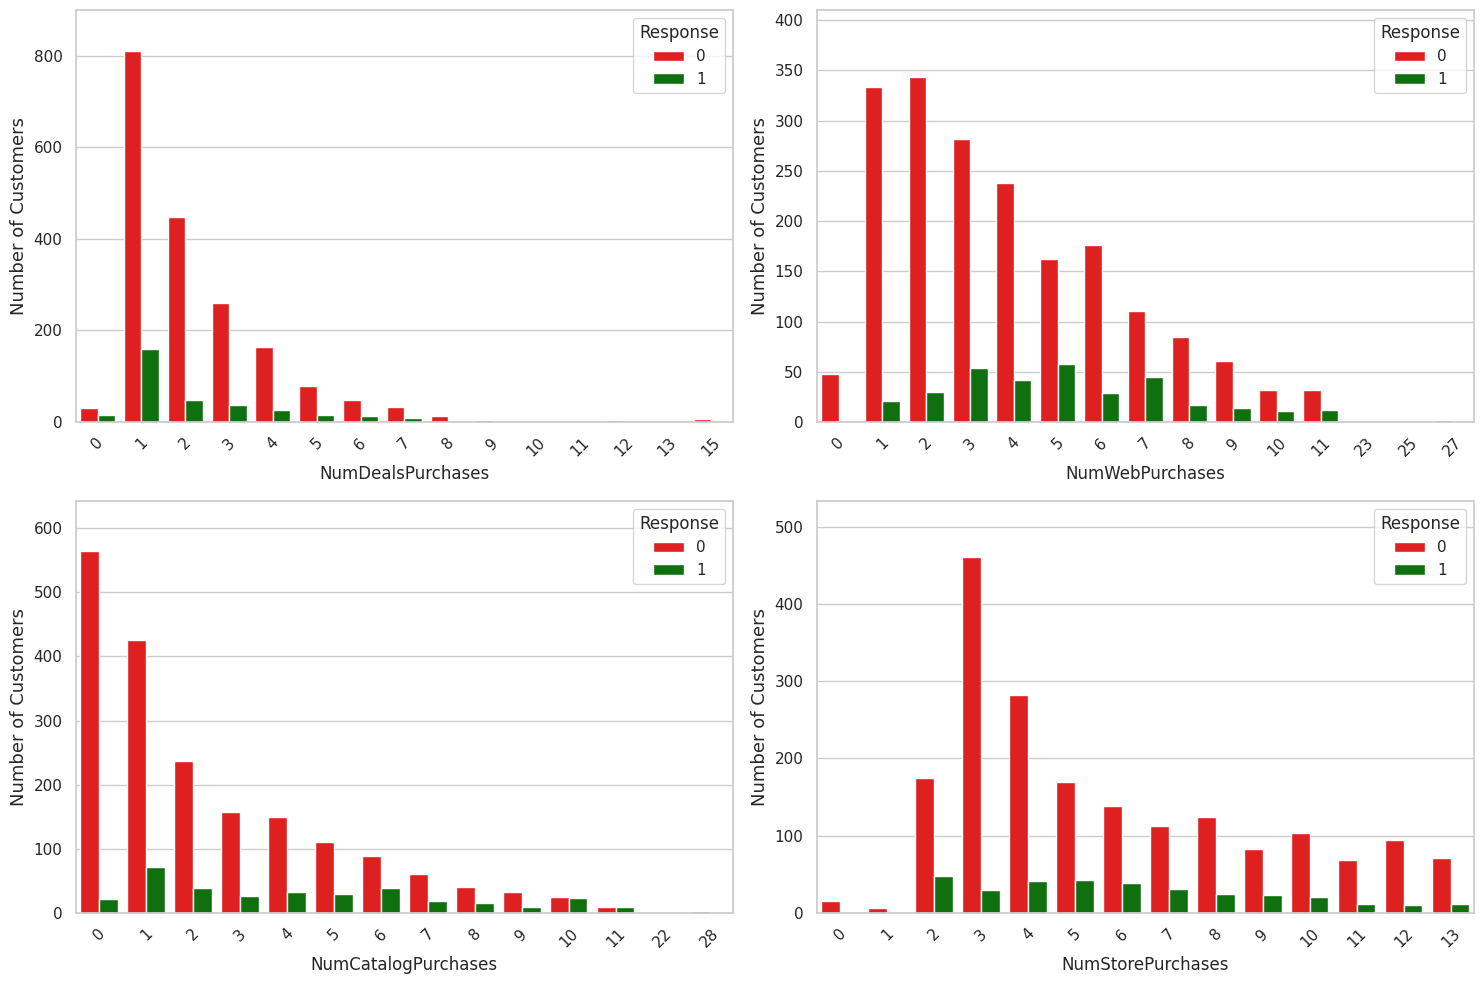

In [173]:
purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

colors=['Red','Green']

n=2
fig = plt.figure(figsize=(15, 10))
for i in range(0, len(purchase_type)):
    fig.add_subplot(n, math.ceil(len(purchase_type)/n), i+1)
    bar = sns.countplot(x=df[purchase_type[i]], hue=df["Response"], palette=colors, orient='h')

    sns.color_palette("YlOrBr")
    plt.xticks(rotation=45)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

### **Income Segment vs. Response**

In [176]:
# group data by Income_sgmt & Response
dfg1 = df.groupby(["Income_sgmt", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nISCustomer"}, inplace=True)

# group data by Income_sgmt
dfg2 = df.groupby(["Income_sgmt"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nCustomer"}, inplace=True)

# merge data
df_income = dfg1.merge(dfg2, on="Income_sgmt")

# calculate ratio
df_income["ratio"] = (df_income["nISCustomer"]/df_income["nCustomer"])*100

# set for label
df_income["Response"] = df_income["Response"].apply(lambda x: "Yes" if x == 1 else "No")

order = ["High", "Medium", "Low", "None"]
df_income = df_income.set_index("Income_sgmt").loc[order].reset_index()
df_income

Income_sgmt Response  nISCustomer  nCustomer  ratio
0        High       No          405        554 73.105
1        High      Yes          149        554 26.895
2      Medium       No          982       1108 88.628
3      Medium      Yes          126       1108 11.372
4         Low       No          496        554 89.531
5         Low      Yes           58        554 10.469
6        None       No           23         24 95.833
7        None      Yes            1         24  4.167

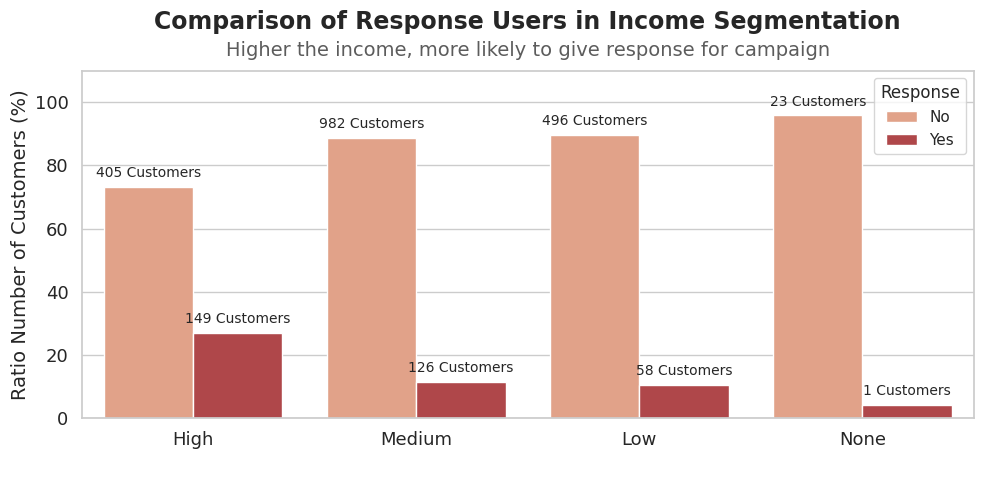

In [177]:
# plotting
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Income_sgmt", y="ratio",
                 data=df_income, hue="Response",
                 palette= list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ncus = df_income[df_income["ratio"] == p.get_height()]["nISCustomer"].values[0]
    ax.annotate(
        f'{ncus} Customers',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize = 10,
        textcoords = 'offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Income Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Higher the income, more likely to give response for campaign"
ax.text((x_start+x_end)/2, y_end*1.14, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

### **Income Segment vs Product**

In [179]:
# product
dfg3 = df.groupby(["Income_sgmt","MntCoke","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]).agg({"ID":"nunique"}).reset_index()
dfg3.rename(columns={"MntCoke":"Coke","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold"}, inplace=True)
df_pivot =pd.pivot_table(dfg3,
                         index = ['Income_sgmt'],
                         values = ['Coke','Fruits','Meat','Fish','Sweet','Gold'],
                         aggfunc = {'Coke':['sum'],'Fruits':['sum'],'Meat':['sum'],'Fish':['sum'],'Sweet':['sum'],'Gold':['sum']}
                        )
df_pivot = df_pivot.reset_index()
df_pivot.columns = ['Income_sgmt','Coke','Fruits','Meat','Fish','Sweet','Gold']
df_cust = df_pivot.melt(id_vars=['Income_sgmt'], value_vars=['Coke','Fruits','Meat','Fish','Sweet','Gold'],
              var_name='Product', value_name='NumCust')

order = ["High", "Medium", "Low", "None"]
df_cust = df_cust.set_index("Income_sgmt").loc[order].reset_index()

df_pivot

Income_sgmt       Coke    Fruits      Meat      Fish      Sweet      Gold
0        High  319949000  44761000  30543000  36057000  221083000  32960000
1         Low   10699000   4313000   2980000   8438000   11500000   2963000
2      Medium  282508000  26422000  19618000  43303000  104974000  18826000
3        None    4733000    652000    512000   1182000    3905000    725000

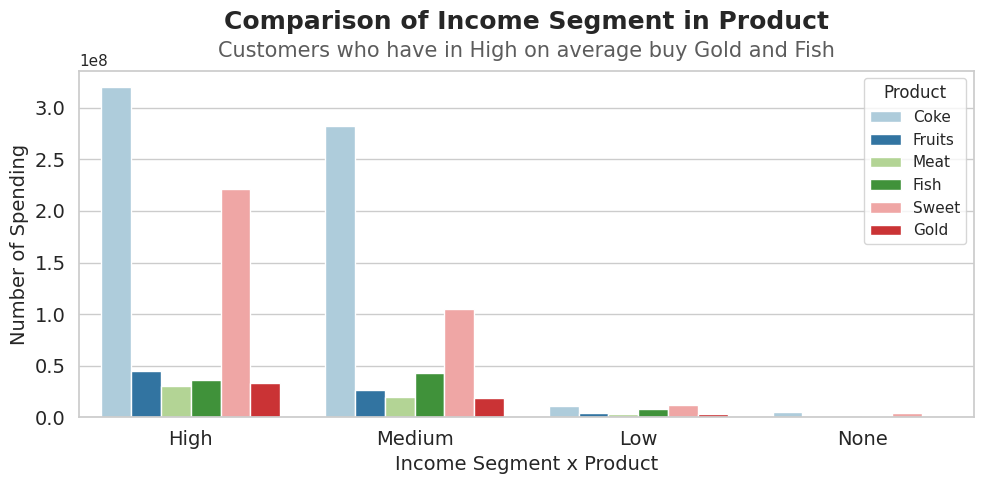

In [180]:
# plotting
plt.figure(figsize = (10,5))

# get color map
cmap = plt.get_cmap('Paired')

ax = sns.barplot(x = "Income_sgmt", y = "NumCust",
                 data = df_cust, hue="Product",
                 palette = cmap.colors)

# set title
plt.ylabel('Number of Spending', fontsize=14)
plt.xlabel('Income Segment x Product', fontsize=14)
plt.title("Comparison of Income Segment in Product",
          fontsize=18, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Customers who have in High on average buy Gold and Fish"
ax.text((x_start+x_end)/2, y_end*1.04, desc,
        ha = 'center',fontsize = 15,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()
plt.show()

### **Income Segment vs Purchase Type**

In [181]:
# product
dfg4 = df.groupby(["Income_sgmt","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]).agg({"ID":"nunique"}).reset_index()
dfg4.rename(columns={"NumDealsPurchases":"Deals","NumWebPurchases":"Website","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store"}, inplace=True)
df_pivot2 =pd.pivot_table(dfg4,
                         index = ['Income_sgmt'],
                         values = ['Deals','Website','Catalog','Store'],
                         aggfunc = {'Deals':['sum'],'Website':['sum'],'Catalog':['sum'],'Store':['sum']}
                        )
df_pivot2 = df_pivot2.reset_index()
df_pivot2.columns = ['Income_sgmt','Deals','Website','Catalog','Store']
df_cust2 = df_pivot2.melt(id_vars=['Income_sgmt'], value_vars=['Deals','Website','Catalog','Store'],
              var_name='Purchase Type', value_name='NumCust')
order = ["High", "Medium", "Low", "None"]
df_cust2 = df_cust2.set_index("Income_sgmt").loc[order].reset_index()
df_pivot2

Income_sgmt  Deals  Website  Catalog  Store
0        High   2311      619     3372   2213
1         Low    133      345      385    393
2      Medium   1977     2184     4568   3602
3        None     44       56      108     94

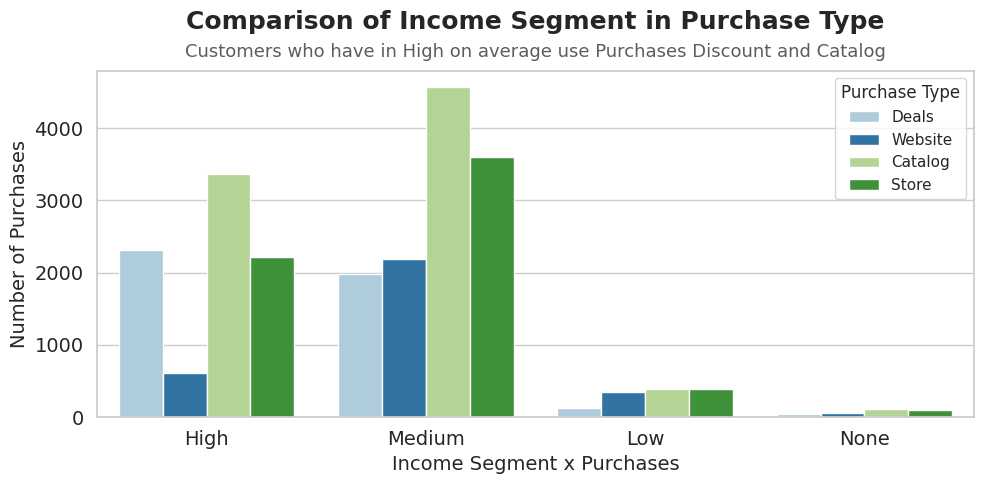

In [182]:
# plotting
plt.figure(figsize = (10,5))

# get color map
cmap = plt.get_cmap('Paired')

ax = sns.barplot(x = "Income_sgmt", y = "NumCust",
                 data = df_cust2, hue="Purchase Type",
                 palette = cmap.colors)

# set title
plt.ylabel('Number of Purchases', fontsize=14)
plt.xlabel('Income Segment x Purchases', fontsize=14)
plt.title("Comparison of Income Segment in Purchase Type",
          fontsize=18, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Customers who have in High on average use Purchases Discount and Catalog"
ax.text((x_start+x_end)/2, y_end*1.04, desc,
        ha = 'center',fontsize = 13,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()
plt.show()

### **Product vs. Response**

In [183]:
dfg3 = df.groupby('Response').agg({'MntCoke' : 'sum',
                            'MntFruits' : 'sum',
                            'MntMeatProducts' : 'sum',
                            'MntFishProducts' : 'sum',
                            'MntSweetProducts' : 'sum',
                            'MntGoldProds' : 'sum' })

dfg3.rename(columns={"MntCoke":"Coke","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold"}, inplace=True)
dfg3 = dfg3.reset_index()

df_cust = dfg3.melt(id_vars=['Response'], value_vars=['Coke','Fruits','Meat','Fish','Sweet','Gold'],
              var_name='Product', value_name='Spending')

df_cust["Response"] = df_cust["Response"].apply(lambda x: "Yes" if x == 1 else "No")

df_cust

Response Product   Spending
0        No    Coke  512913000
1       Yes    Coke  167903000
2        No  Fruits   46157000
3       Yes  Fruits   12760000
4        No    Meat  275654000
5       Yes    Meat   98314000
6        No    Fish   66672000
7       Yes    Fish   17385000
8        No   Sweet   47717000
9       Yes   Sweet   12904000
10       No    Gold   78086000
11      Yes    Gold   20523000

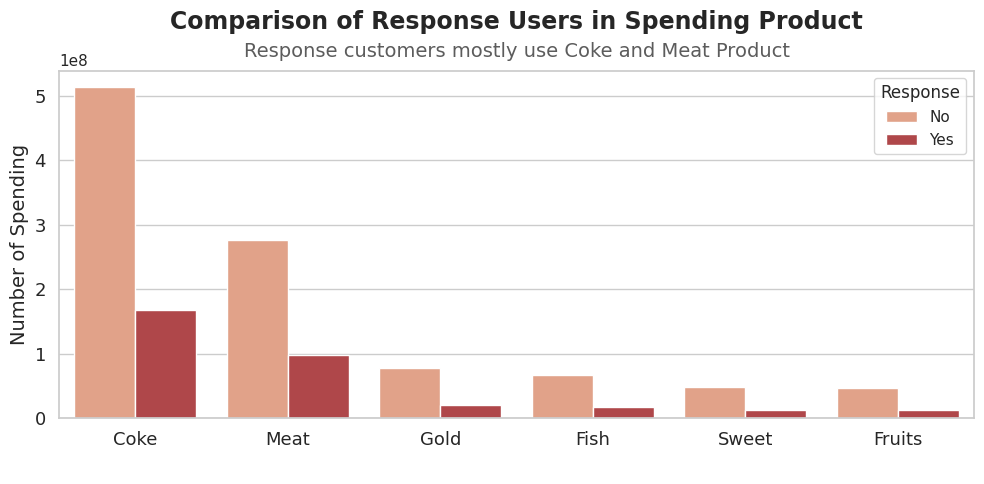

In [185]:
# plotting
df_cust.sort_values(["Spending","Product"], ascending=False, inplace=True, ignore_index = True)

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Product", y="Spending",
                 data=df_cust, hue="Response",
                 palette= list(sns.color_palette("RdBu"))[::-1][-2:])

# set title
plt.ylabel('Number of Spending', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Spending Product",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Response customers mostly use Coke and Meat Product"
ax.text((x_start+x_end)/2, y_end*1.04, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

plt.tight_layout()
plt.show()

### **Total Campaign vs Num Values**

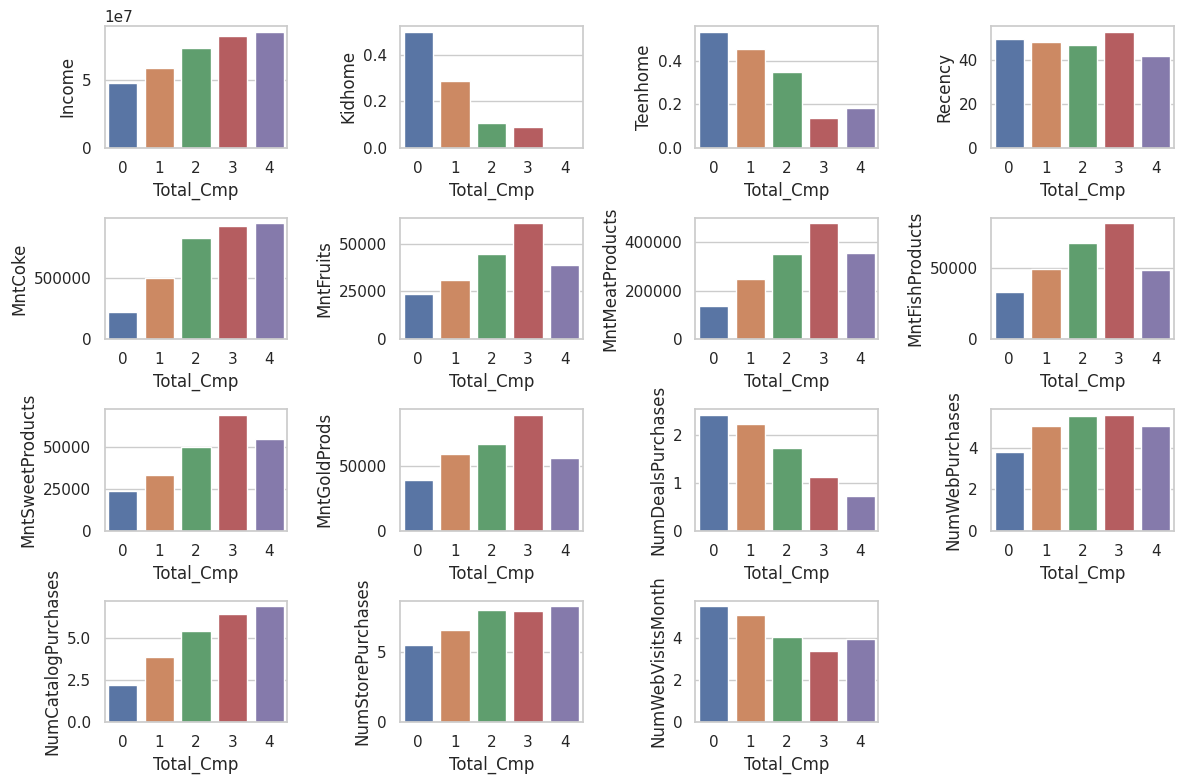

In [186]:
plt.figure(figsize=(12,8))
num = [i for i in num_cols if i not in ["Year_Birth", "Z_CostContact","Z_Revenue"]]
n=4
for i, col in enumerate(df[num]):
    plt.subplot(n, math.ceil(len(num)/n), i+1)
    sns.barplot(x=df["Total_Cmp"], y=df[col], errorbar=None)
    plt.tight_layout()